<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        AUTOSCOUT24 CAR PRICE PREDICTION (EDA and ML)
    </h1>
    </div>

<h2 align="center"><font color=#20a0ff> Linear Regression Models (Linear-Ridge-Lasso-ElasticNet) </font></h2>

---

### Introduction

- This project aims to predict car prices using the Auto Scout dataset from AutoScout24, containing features of 9 different car models.
- By performing Exploratory Data Analysis (EDA) and implementing machine learning models, the goal is to gain insights into the data and build effective regression models for car price prediction.
- Additionally, these models can support automotive industry stakeholders in understanding market trends, optimizing pricing strategies, and making data-driven decisions. Consumers can also benefit by making informed choices when selecting vehicles.
- Ultimately, the goal is to leverage data-driven insights to enhance the understanding of the automotive market, improve pricing accuracy, and support sustainable development in the automotive industry.

### Objectives

1. **Understand the dataset and its features.**
2. **Clean and prepare the data for modeling.**
3. **Implement various regression algorithms to predict car prices.**
4. **Optimize model performance by tuning hyperparameters and focusing on important features.**
5. **Compare the performance of different regression algorithms.**



*The dataset and results are used for educational purposes, demonstrating the application of advanced machine learning techniques on real-world data. We aim to build effective regression models to predict car prices and gain a deeper understanding of machine learning techniques.*

### About the Dataset
The **Auto Scout** data is sourced from the online car trading company [AutoScout24](https://www.autoscout24.com) in 2019 and contains various features of 9 different car models. This project uses a pre-processed and organized dataset to explore and understand machine learning algorithms, particularly for car price prediction using regression techniques.

**Dataset:** AutoScout24 Car Sales Dataset  
- **Content:** Data on various features of 9 different car models.  
- **Number of Rows:** 15,178  
- **Number of Columns:** 23  

**Inputs:**
- **make_model:** The make and model of the car
- **body_type:** The type of the car (e.g., Sedan)
- **price:** The price of the car (in EUR)
- **vat:** VAT status
- **km:** The car's mileage
- **Type:** The condition of the car (e.g., used)
- **Fuel:** The type of fuel (e.g., Diesel, Petrol)
- **Gears:** Number of gears
- **Comfort_Convenience:** Comfort and convenience features
- **Entertainment_Media:** Entertainment and media features
- **Extras:** Extra features
- **Safety_Security:** Safety and security features
- **age:** The age of the car
- **Previous_Owners:** Number of previous owners
- **hp_kW:** Engine power (in kW)
- **Inspection_new:** New inspection status
- **Paint_Type:** Type of paint
- **Upholstery_type:** Type of upholstery
- **Gearing_Type:** Type of gearing (e.g., automatic)
- **Displacement_cc:** Engine displacement (in cc)
- **Weight_kg:** The weight of the car (in kg)
- **Drive_chain:** Type of drive (e.g., front-wheel drive)
- **cons_comb:** Combined fuel consumption (L/100 km)

<a id="4."></a>
# 1. EXPLORATORY DATA ANALYSIS (EDA)

<a id="2."></a>
## Import the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.3f}'.format

%matplotlib inline

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

<a id="3"></a>
## Read the Dataset

In [4]:
df0 = pd.read_csv('/content/autoscout_car_sales.csv')
df = df0.copy()

In [5]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770.000,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1.000,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500.000,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0.000,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640.000,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0.000,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500.000,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0.000,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790.000,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1.000,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15178 entries, 0 to 15177
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15178 non-null  object 
 1   body_type            15177 non-null  object 
 2   price                15177 non-null  float64
 3   vat                  15177 non-null  object 
 4   km                   15177 non-null  float64
 5   Type                 15177 non-null  object 
 6   Fuel                 15177 non-null  object 
 7   Gears                15177 non-null  float64
 8   Comfort_Convenience  15177 non-null  object 
 9   Entertainment_Media  15177 non-null  object 
 10  Extras               15177 non-null  object 
 11  Safety_Security      15177 non-null  object 
 12  age                  15177 non-null  float64
 13  Previous_Owners      15177 non-null  float64
 14  hp_kW                15177 non-null  float64
 15  Inspection_new       15177 non-null 

In [7]:
df.sample(2)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
8247,Opel Corsa,Compact,12950.000,VAT deductible,39979.000,Used,Benzine,5.000,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,Hands-free equipment,MP3,On-board co...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",3.000,1.000,66.000,0.000,Metallic,Part/Full Leather,Automatic,1398.000,1063.000,front,4.700
11553,Opel Insignia,Sedans,18900.000,VAT deductible,19500.000,Used,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Touch screen","ABS,Alarm system,Central door lock,Daytime run...",1.000,1.000,103.000,1.000,Metallic,Cloth,Manual,1490.000,1503.000,front,5.900


## Rename the Columns

In [8]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [9]:
df.rename(columns={
    'make_model': 'make_model',
    'body_type': 'body_type',
    'price': 'price',
    'vat': 'vat',
    'km': 'km',
    'Type': 'type',
    'Fuel': 'fuel_type',
    'Gears': 'gears_num',
    'Comfort_Convenience': 'comfort_convenience',
    'Entertainment_Media': 'entertainment_media',
    'Extras': 'extras',
    'Safety_Security': 'safety_security',
    'age': 'age',
    'Previous_Owners': 'previous_owners',
    'hp_kW': 'hp_kw',
    'Inspection_new': 'inspection_new',
    'Paint_Type': 'paint_type',
    'Upholstery_type': 'upholstery_type',
    'Gearing_Type': 'gearing_type',
    'Displacement_cc': 'displacement_cc',
    'Weight_kg': 'weight_kg',
    'Drive_chain': 'drive_chain',
    'cons_comb': 'fuel_cons_comb'
}, inplace=True)


In [10]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel_type',
       'gears_num', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'fuel_cons_comb'],
      dtype='object')

## Check Missing Values

In [11]:
# Check out the missing values

missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
make_model,0,0.000
body_type,1,0.010
price,1,0.010
vat,1,0.010
km,1,0.010
type,1,0.010
fuel_type,1,0.010
gears_num,1,0.010
comfort_convenience,1,0.010
entertainment_media,1,0.010


In [12]:
# Find records with at least one missing value
missing_records = df[df.isnull().any(axis=1)]

# Display the records
print(missing_records)

      make_model body_type  price  vat  km type fuel_type  gears_num  \
15177        Ren       NaN    NaN  NaN NaN  NaN       NaN        NaN   

      comfort_convenience entertainment_media extras safety_security  age  \
15177                 NaN                 NaN    NaN             NaN  NaN   

       previous_owners  hp_kw  inspection_new paint_type upholstery_type  \
15177              NaN    NaN             NaN        NaN             NaN   

      gearing_type  displacement_cc  weight_kg drive_chain  fuel_cons_comb  
15177          NaN              NaN        NaN         NaN             NaN  


In [13]:
# Remove records with any missing values
df = df.dropna()

# Reset the index (optional)
df.reset_index(drop=True, inplace=True)

In [14]:
# Check out the missing values

missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
make_model,0,0.000
body_type,0,0.000
price,0,0.000
vat,0,0.000
km,0,0.000
type,0,0.000
fuel_type,0,0.000
gears_num,0,0.000
comfort_convenience,0,0.000
entertainment_media,0,0.000


## Check Duplicated Values

In [16]:
# Let's observe first the unique values

def get_unique_values(df):

    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [17]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,make_model,9,"[Audi A1, Audi A2, Audi A3, Opel Astra, Opel C...",object
1,body_type,8,"[Sedans, Station wagon, Compact, Coupe, Van, O...",object
2,price,2734,-,float64
3,vat,2,"[VAT deductible, Price negotiable]",object
4,km,6498,-,float64
5,type,5,"[Used, Employee's car, New, Demonstration, Pre...",object
6,fuel_type,4,"[Diesel, Benzine, LPG/CNG, Electric]",object
7,gears_num,4,"[7.0, 6.0, 5.0, 8.0]",float64
8,comfort_convenience,5794,-,object
9,entertainment_media,327,-,object


In [18]:
# Checks duplicates and drops them

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are 1599 duplicated observations in the dataset.
1599 duplicates were dropped!
No more duplicate rows!


In [19]:
df.duplicated().sum()

np.int64(0)

- Understanding the context and data collection methods is crucial to determine the cause of duplicates.
- Whether to drop duplicates depends on the analysis purpose.
- For analyzing changes over time or variations, keeping duplicates might be more appropriate.
- However, since I will be using a linear model, I dropped these rows because duplicate rows contain similar values.

## Basic Statistics

In [21]:
# Basic statistics summary of Numerical features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,13578.000,17414.815,6585.709,4950.000,12737.000,16627.500,21450.000,74600.000
km,13578.000,32774.029,36751.834,0.000,4282.500,21546.500,47000.000,317000.000
gears_num,13578.000,5.929,0.713,5.000,5.000,6.000,6.000,8.000
age,13578.000,1.425,1.107,0.000,0.000,1.000,2.000,3.000
previous_owners,13578.000,1.041,0.339,0.000,1.000,1.000,1.000,4.000
hp_kw,13578.000,86.585,24.809,40.000,66.000,85.000,100.000,294.000
inspection_new,13578.000,0.259,0.438,0.000,0.000,0.000,1.000,1.000
displacement_cc,13578.000,1419.506,275.506,890.000,1229.000,1461.000,1598.000,2967.000
weight_kg,13578.000,1323.597,185.308,840.000,1163.000,1280.000,1425.000,2471.000
fuel_cons_comb,13578.000,4.799,0.844,3.000,4.100,4.800,5.400,9.100


In [22]:
# Basic statistics summary of Object features

df.describe(include= 'object').T

,count,unique,top,freq
make_model,13578,9,Audi A3,2758
body_type,13578,8,Sedans,7218
vat,13578,2,VAT deductible,12788
type,13578,5,Used,9799
fuel_type,13578,4,Benzine,7359
comfort_convenience,13578,5794,"Air conditioning,Electrical side mirrors,Hill ...",312
entertainment_media,13578,327,"Bluetooth,Hands-free equipment,On-board comput...",1560
extras,13578,647,Alloy wheels,4719
safety_security,13578,4149,"ABS,Central door lock,Daytime running lights,D...",635
paint_type,13578,3,Metallic,13030


<a id="num"></a>
## Numerical Features

### Distributions of Numerical Features

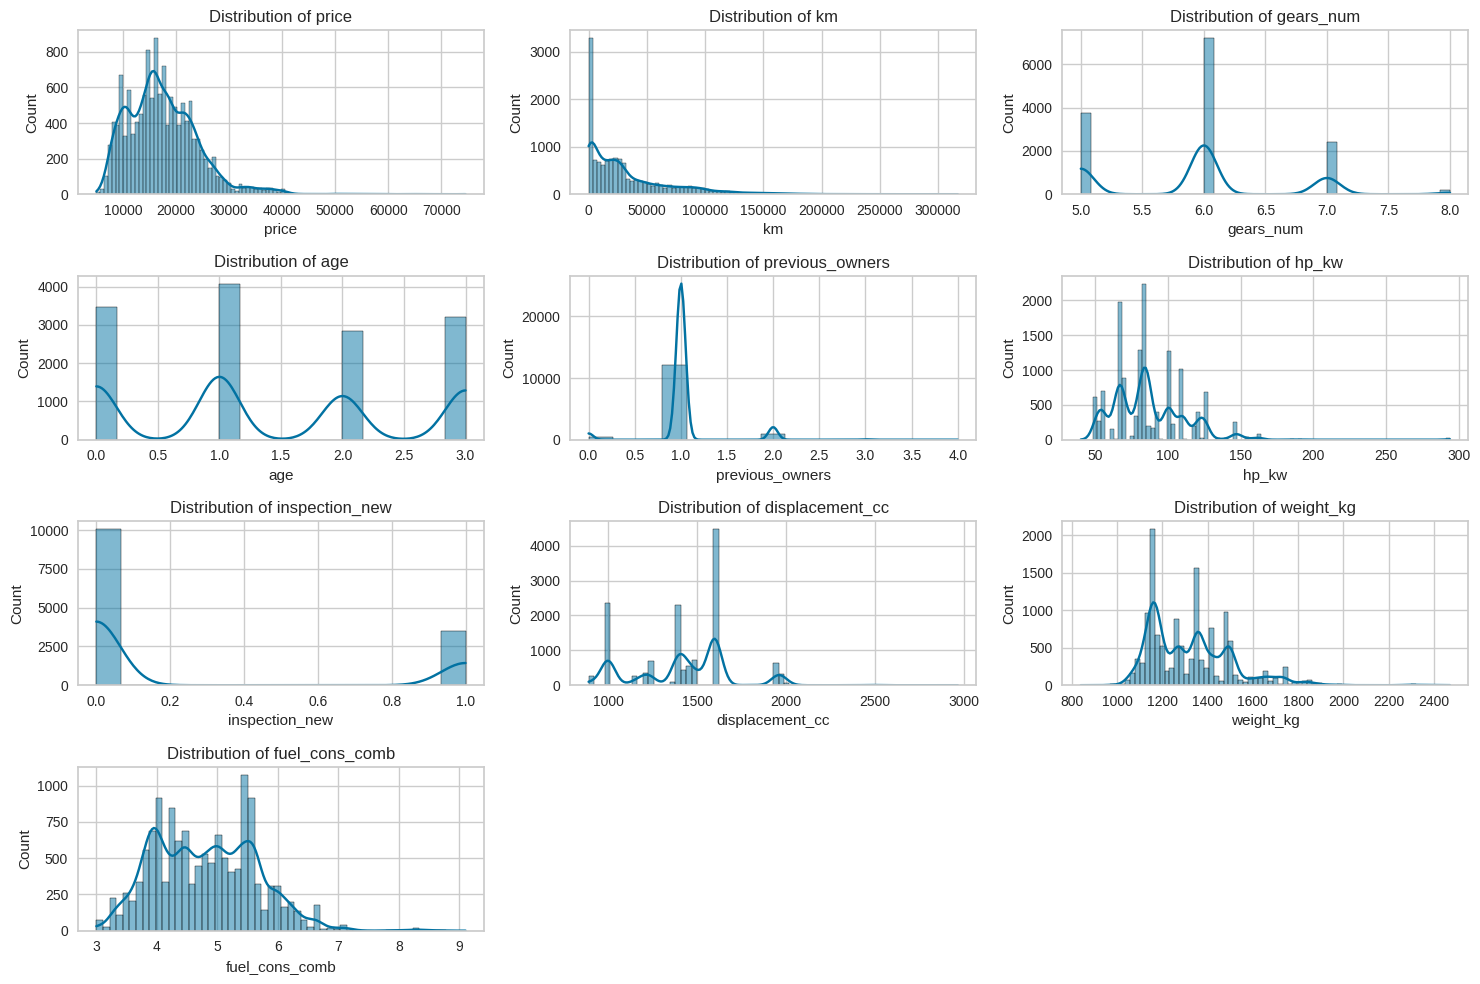

In [23]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

**Distributions of the Numerical Features:**

1. **Price:** Distribution is right-skewed, with most prices concentrated between 10,000 and 20,000 EUR. Some higher-end outliers, particularly above 40,000 EUR.
2. **Km (Mileage):** Distribution is right-skewed, with most vehicles having low mileage. Values above 150,000 km are less common.
3. **Gears Number:** Most vehicles have 5, 6, or 7 gears. Vehicles with 8 gears are rare.
4. **Age:** Peaks at 0, 1, 2, and 3 years, indicating these are common ages for vehicles. Vehicles are generally up to 3 years old.
5. **Previous Owners:** Most vehicles have had one or two previous owners. Vehicles with 3 or more previous owners are less common.
6. **Hp_kw (Engine Power in kW):** Distribution is right-skewed, with most vehicles between 50 and 150 kW. Vehicles above 200 kW are less frequent.
7. **Inspection_new (New Inspection):** Concentration at the extremes (values of 0 and 1). Mid-range values are rare.
8. **Displacement_cc (Engine Displacement in cc):** A peak at 1500 cc. Values above 2000 cc are less common.
9. **Weight_kg:** Most vehicles are between 1000 and 1500 kg. Vehicles above 2000 kg are rare.
10. **Fuel Consumption Combined:** Approximately normal distribution, with most values between 4 and 6 l/100 km. Values above 8 l/100 km are less frequent.

**Overall:**
- **Right-Skewed Distributions:** Many features like `price`, `km`, and `hp_kw` show right-skewed distributions. This skewness might affect the assumptions of linear models, which assume normally distributed residuals.
- **Peaks in Categorical Data:** Features such as `gears_num` and `age` have distinct peaks, indicating specific common values that could be significant predictors in the model.
- **Outliers:** While several features have some higher-end outliers, their impact on linear modeling needs careful assessment to ensure they do not disproportionately influence the model.
- **Data Transformation:** Consider data transformations (e.g., log transformation) to normalize the distributions of skewed features, improving the performance and accuracy of linear models.
- **Feature Scaling:** Ensure all features are appropriately scaled, especially those with wide ranges like `km` and `price`, to ensure effective model training.

By addressing these considerations, linear modeling can be made more robust and accurate with this dataset.

<a id="cat"></a>
## Categorical Features

### Distributions of Categorical Features

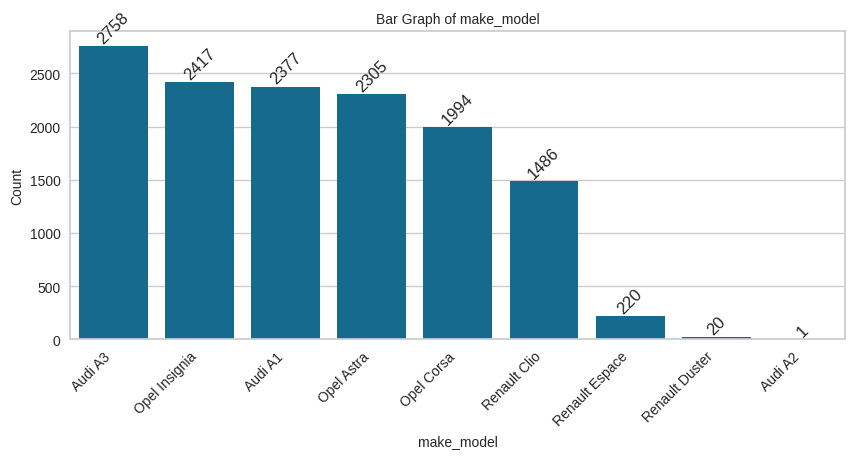

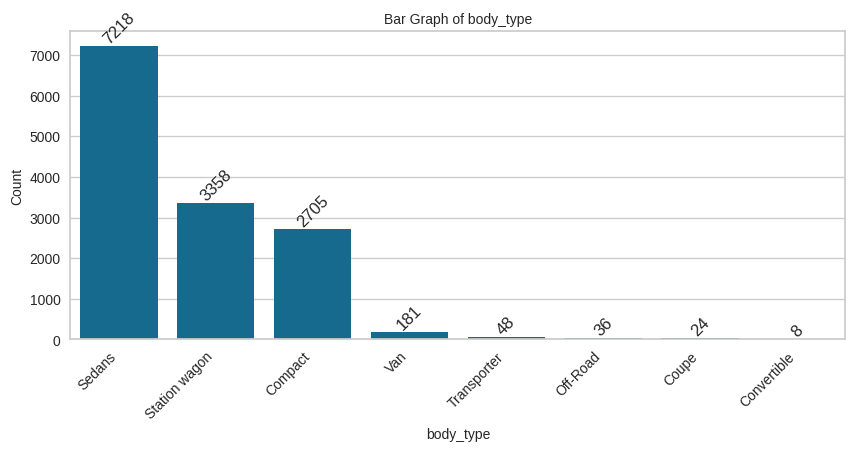

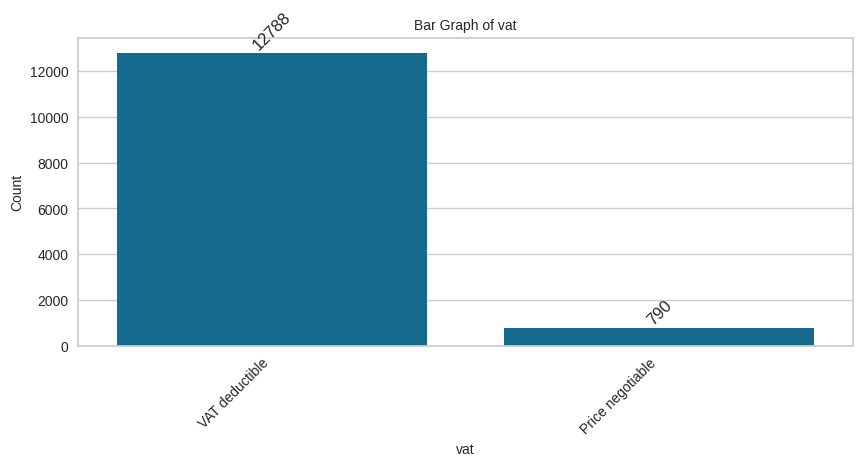

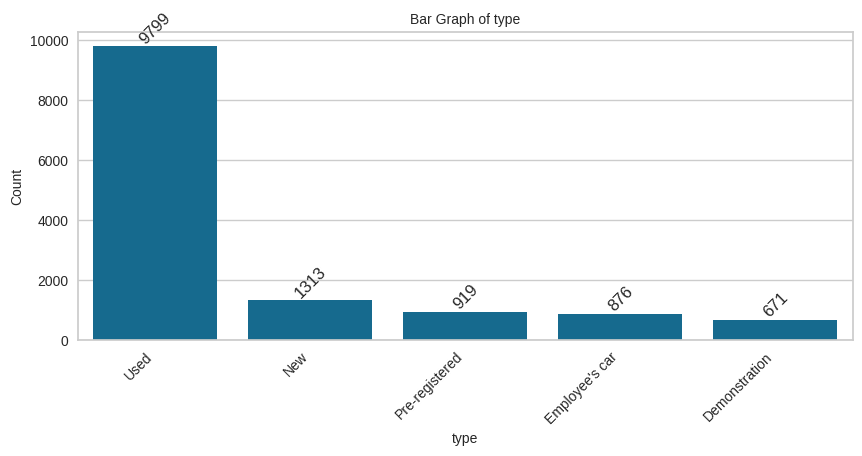

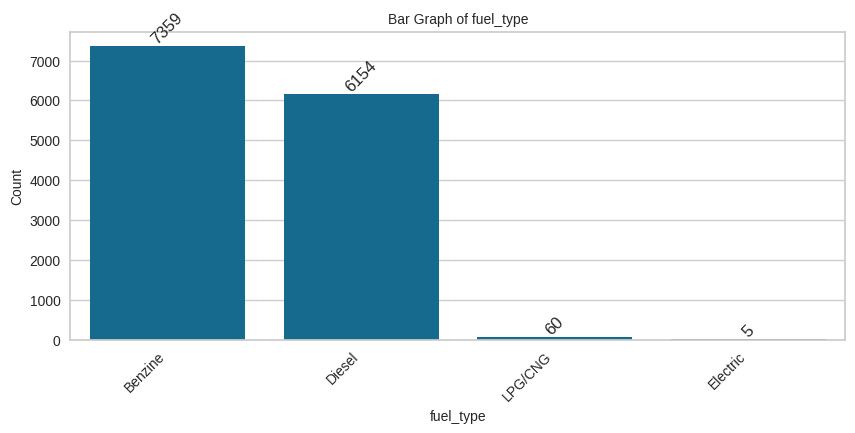

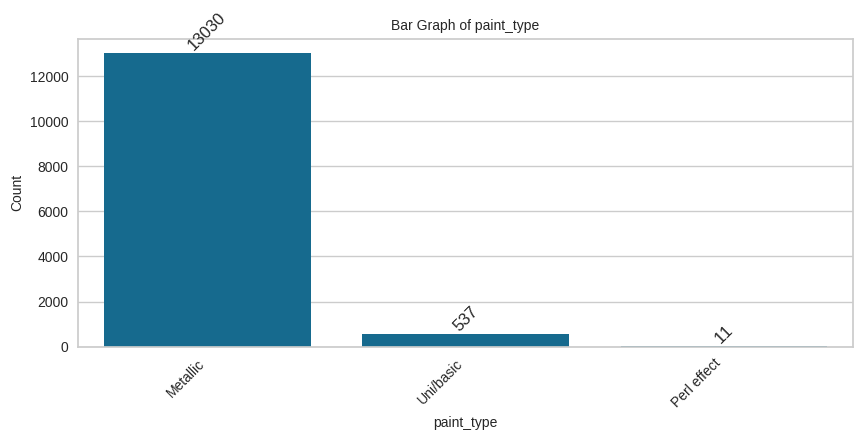

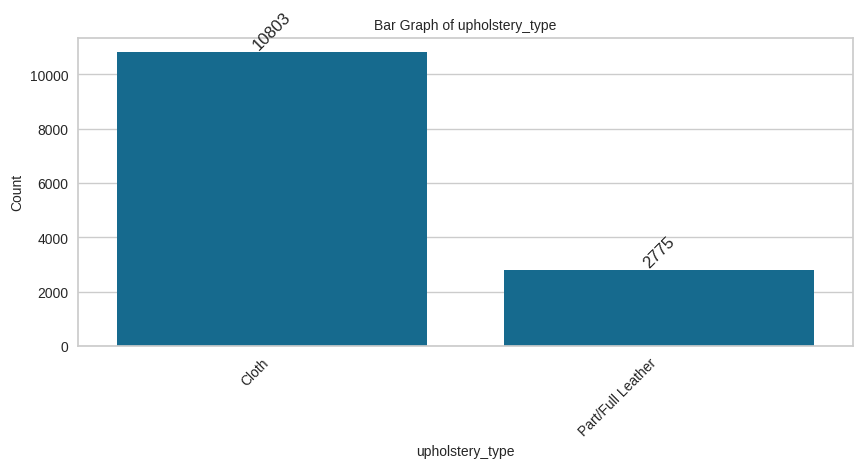

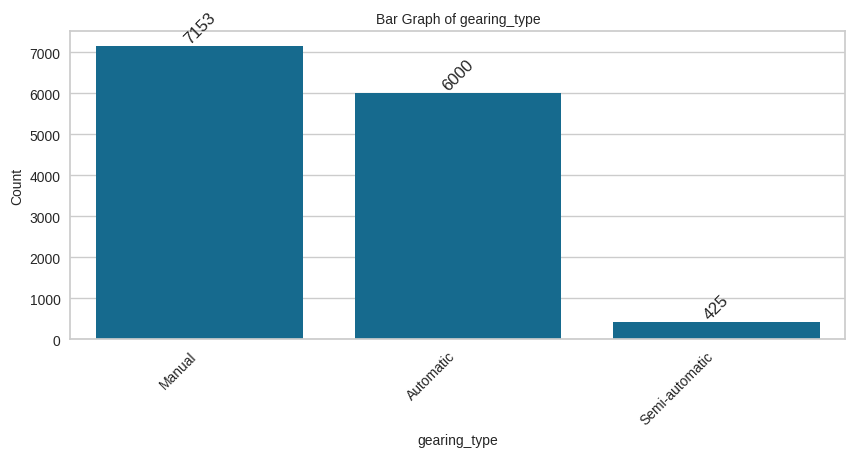

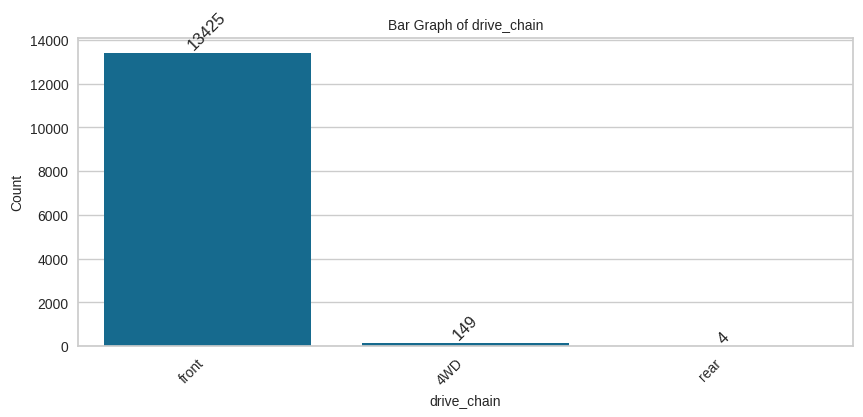

In [24]:
import plotly.graph_objects as go
import plotly.express as px

# Distribution of our categorical characteristics with bar graph


def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 4))
        ax = sns.countplot(x=column,
                           data=df,
                           order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0], rotation=45)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.title(f'Bar Graph of {column}', fontsize=10)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.show()


cat_features = [
    'make_model', 'body_type', 'vat', 'type', 'fuel_type', 'paint_type',
    'upholstery_type', 'gearing_type', 'drive_chain'
]

plot_bar_graphs(df, cat_features)

<a id="corr"></a>
## Correlations

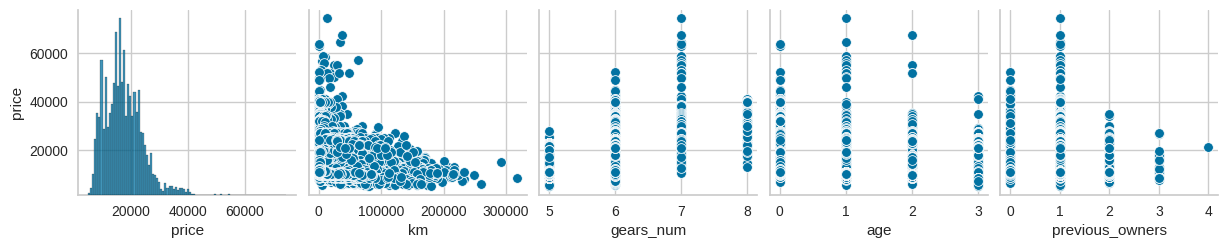

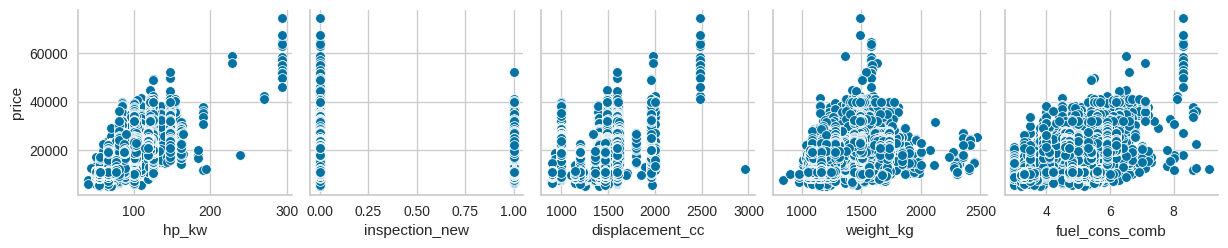

In [25]:
# Target vs Numerical Features

numerical_df = df.select_dtypes(include=['number'])

for i in range(0, len(numerical_df.columns), 5):
    sns.pairplot(data=numerical_df,
                x_vars=numerical_df.columns[i:i+5],
                y_vars=['price'])

### Label Encoding

In [26]:
# Label the categorical features to see the correlation between categorical features and Target veraible.

from sklearn.preprocessing import LabelEncoder

# Copy the original dataframe to avoid modifying it directly
df_labeled = df.copy()

# List of categorical columns
categorical_columns = ['make_model', 'body_type', 'vat', 'type', 'fuel_type', 'comfort_convenience',
'entertainment_media', 'extras', 'safety_security', 'paint_type',
'upholstery_type', 'gearing_type', 'drive_chain']

# Apply Label Encoding to each categorical column
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_labeled[column] = le.fit_transform(df_labeled[column])
    label_encoders[column] = le

# Display the first few rows of the labeled dataframe
print(df_labeled.head())

   make_model  body_type     price  vat        km  type  fuel_type  gears_num  \
0           0          4 15770.000    1 56013.000     4          1      7.000   
1           0          4 14500.000    0 80000.000     4          0      7.000   
2           0          4 14640.000    1 83450.000     4          1      7.000   
3           0          4 14500.000    1 73000.000     4          1      6.000   
4           0          4 16790.000    1 16200.000     4          1      7.000   

   comfort_convenience  entertainment_media  extras  safety_security   age  \
0                  788                  163     240             2884 3.000   
1                 4323                  164     483             2384 2.000   
2                 4634                  303     518             3020 3.000   
3                 5600                   45     494             1353 3.000   
4                 2220                   46     461             3356 3.000   

   previous_owners   hp_kw  inspection_new  

In [27]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13578 entries, 0 to 15176
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           13578 non-null  int64  
 1   body_type            13578 non-null  int64  
 2   price                13578 non-null  float64
 3   vat                  13578 non-null  int64  
 4   km                   13578 non-null  float64
 5   type                 13578 non-null  int64  
 6   fuel_type            13578 non-null  int64  
 7   gears_num            13578 non-null  float64
 8   comfort_convenience  13578 non-null  int64  
 9   entertainment_media  13578 non-null  int64  
 10  extras               13578 non-null  int64  
 11  safety_security      13578 non-null  int64  
 12  age                  13578 non-null  float64
 13  previous_owners      13578 non-null  float64
 14  hp_kw                13578 non-null  float64
 15  inspection_new       13578 non-null  floa

### Heatmap

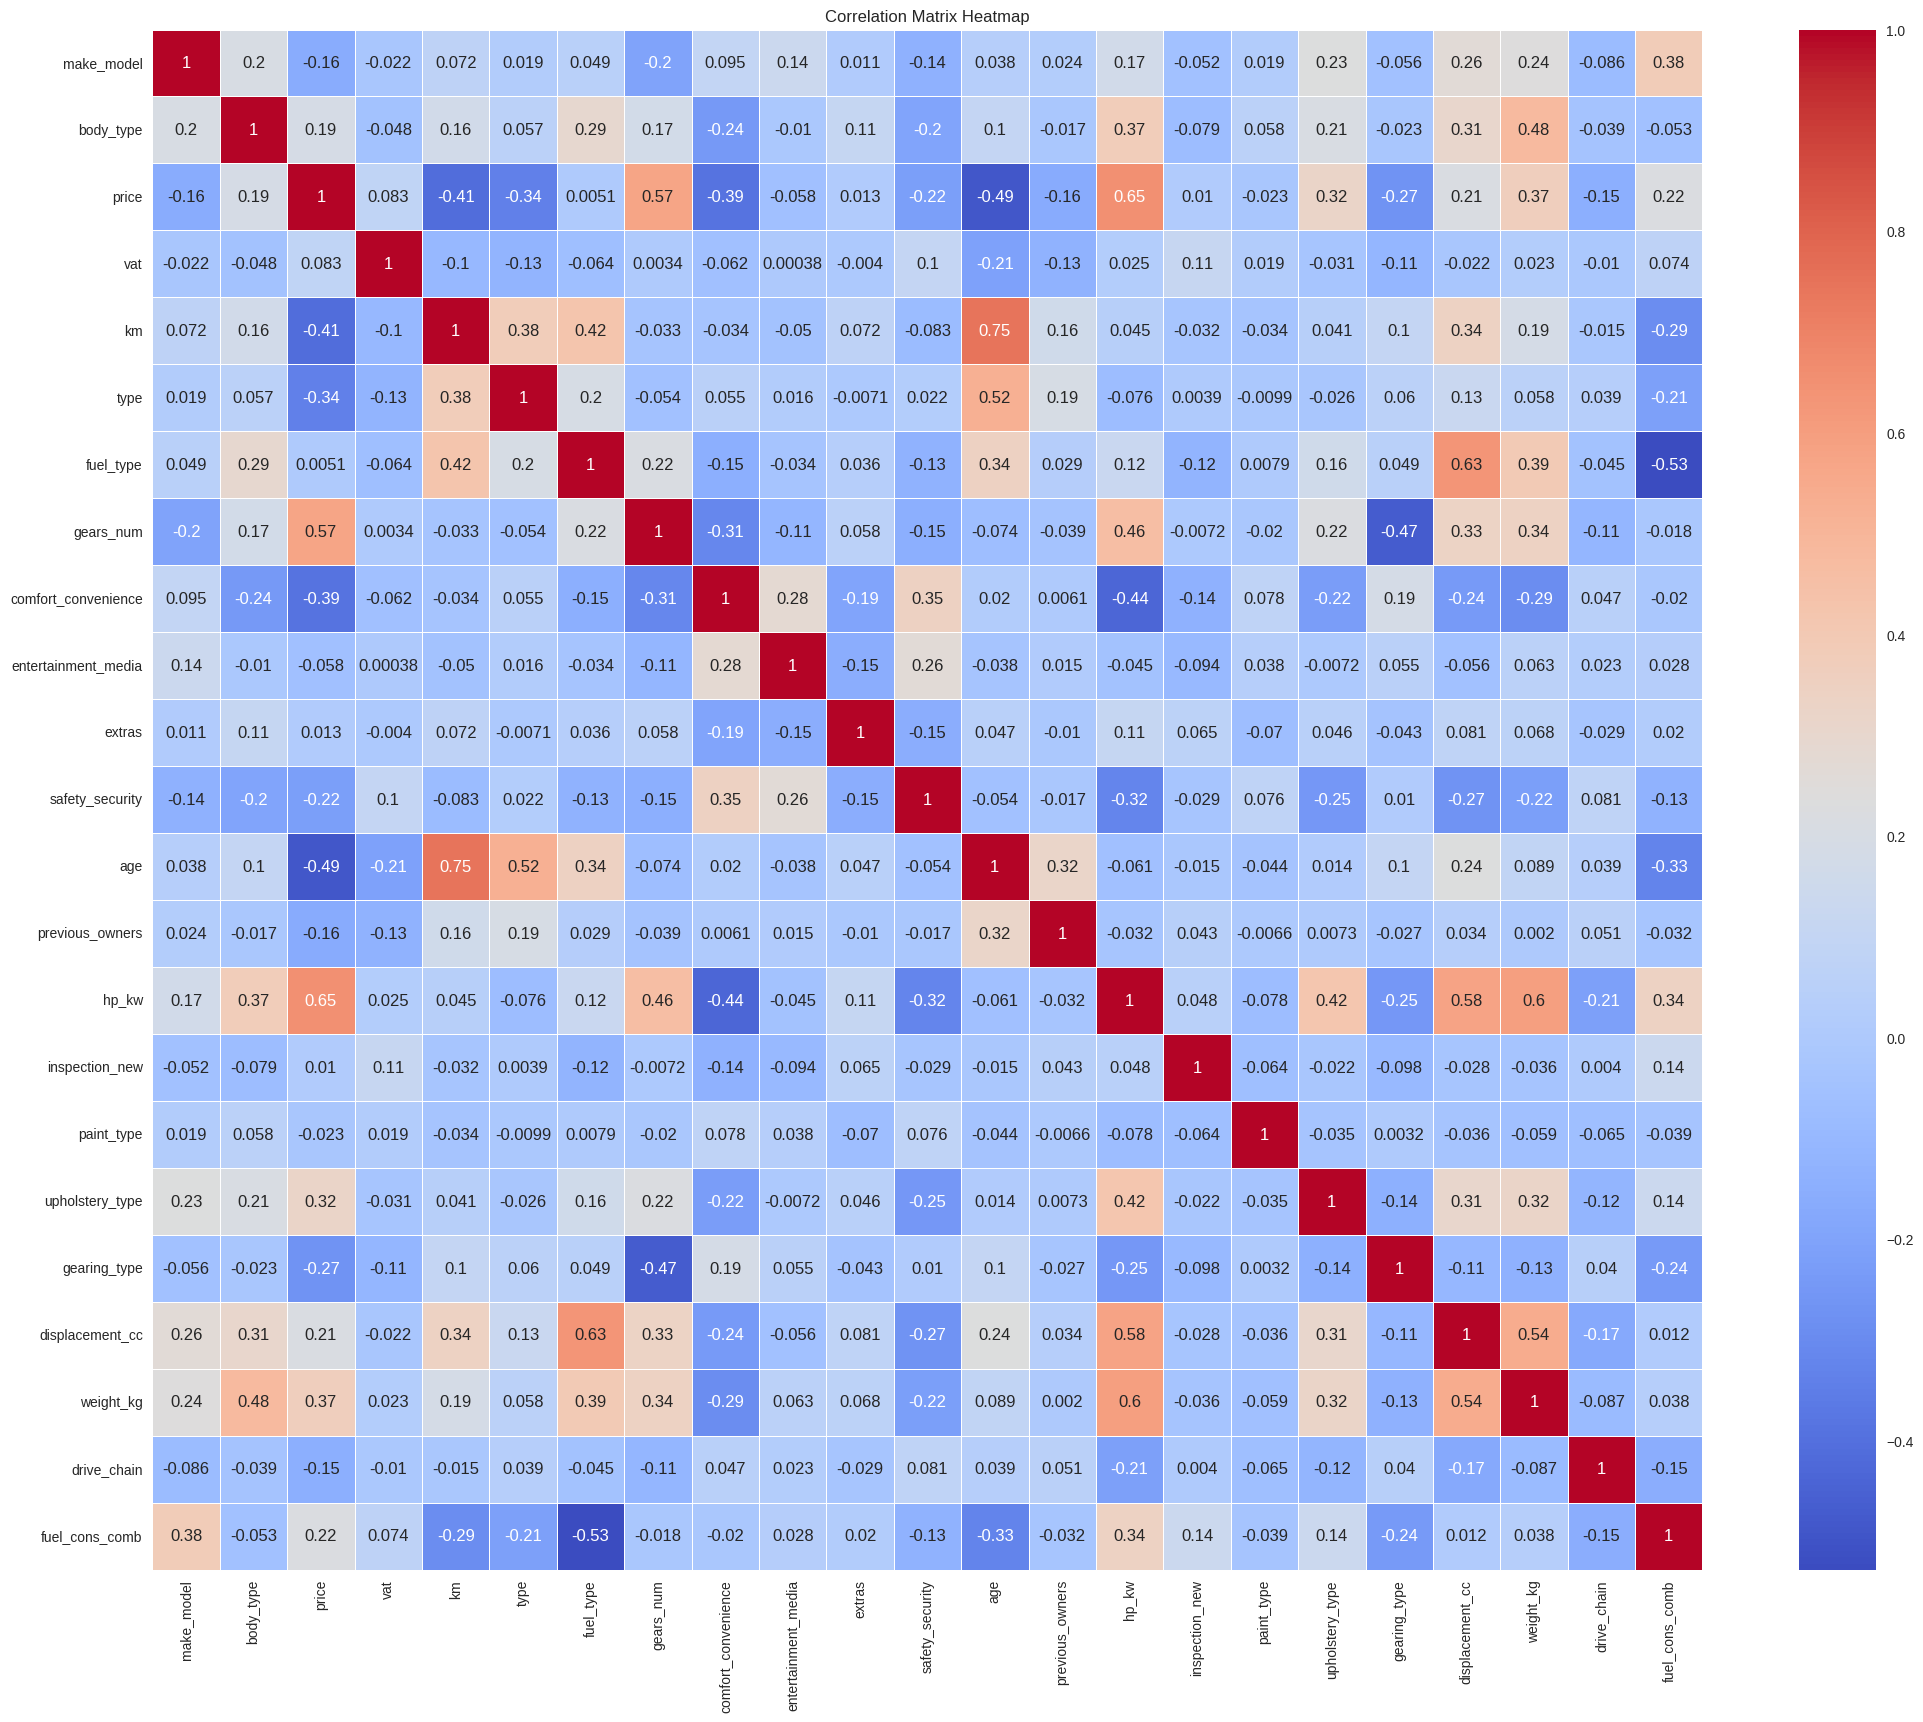

In [28]:
# Corr of all features used Labeled df

correlation_matrix = df_labeled.corr()

plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
# Check Multicolinarty between features

def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

df_labeled.corr().style.map(color_custom)

,make_model,body_type,price,vat,km,type,fuel_type,gears_num,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,fuel_cons_comb
make_model,1.000000,0.201715,-0.159851,-0.021852,0.072003,0.019433,0.049157,-0.202744,0.095317,0.136008,0.010530,-0.138260,0.038459,0.023607,0.165215,-0.051693,0.018555,0.230204,-0.056319,0.264448,0.241348,-0.085782,0.380849
body_type,0.201715,1.000000,0.193570,-0.047505,0.164722,0.057180,0.292917,0.171168,-0.243107,-0.010403,0.108325,-0.197081,0.104024,-0.017075,0.373370,-0.079052,0.058411,0.206134,-0.023190,0.306048,0.480374,-0.038641,-0.053423
price,-0.159851,0.193570,1.000000,0.082871,-0.411777,-0.338133,0.005138,0.572547,-0.387231,-0.058132,0.012896,-0.223519,-0.491957,-0.164901,0.652702,0.010381,-0.022988,0.319536,-0.265509,0.212303,0.365157,-0.150875,0.218121
vat,-0.021852,-0.047505,0.082871,1.000000,-0.100964,-0.126374,-0.063993,0.003388,-0.061879,0.000376,-0.003996,0.103051,-0.206654,-0.132744,0.024629,0.112293,0.018626,-0.030853,-0.111369,-0.021759,0.022543,-0.010237,0.074299
km,0.072003,0.164722,-0.411777,-0.100964,1.000000,0.377463,0.424438,-0.032865,-0.034267,-0.050498,0.072017,-0.082756,0.745769,0.161199,0.044845,-0.032378,-0.034003,0.040676,0.102409,0.341378,0.186321,-0.014930,-0.291178
type,0.019433,0.057180,-0.338133,-0.126374,0.377463,1.000000,0.196382,-0.053878,0.055222,0.015635,-0.007097,0.022246,0.523313,0.194973,-0.076225,0.003872,-0.009917,-0.026215,0.060488,0.128179,0.057576,0.038549,-0.212268
fuel_type,0.049157,0.292917,0.005138,-0.063993,0.424438,0.196382,1.000000,0.216392,-0.151109,-0.033504,0.035567,-0.129945,0.344119,0.028955,0.122887,-0.124965,0.007913,0.161761,0.048953,0.630875,0.392466,-0.045451,-0.528097
gears_num,-0.202744,0.171168,0.572547,0.003388,-0.032865,-0.053878,0.216392,1.000000,-0.314385,-0.110341,0.057894,-0.148013,-0.073641,-0.038934,0.459243,-0.007239,-0.019731,0.219415,-0.469699,0.333112,0.341573,-0.111791,-0.018189
comfort_convenience,0.095317,-0.243107,-0.387231,-0.061879,-0.034267,0.055222,-0.151109,-0.314385,1.000000,0.281155,-0.194207,0.345108,0.019559,0.006142,-0.437282,-0.137010,0.077860,-0.224011,0.185971,-0.238407,-0.294945,0.047442,-0.019805
entertainment_media,0.136008,-0.010403,-0.058132,0.000376,-0.050498,0.015635,-0.033504,-0.110341,0.281155,1.000000,-0.153839,0.260372,-0.038178,0.015055,-0.045229,-0.093976,0.038126,-0.007170,0.055173,-0.056384,0.062533,0.023108,0.027705


In [30]:
# Corr between Target vs other Features

correlation_matrix = df_labeled.corr() # Labeled df

price_corr = correlation_matrix['price'].sort_values(ascending= False)
price_corr

,price
price,1.000
hp_kw,0.653
gears_num,0.573
weight_kg,0.365
upholstery_type,0.320
fuel_cons_comb,0.218
displacement_cc,0.212
body_type,0.194
vat,0.083
extras,0.013


<Axes: >

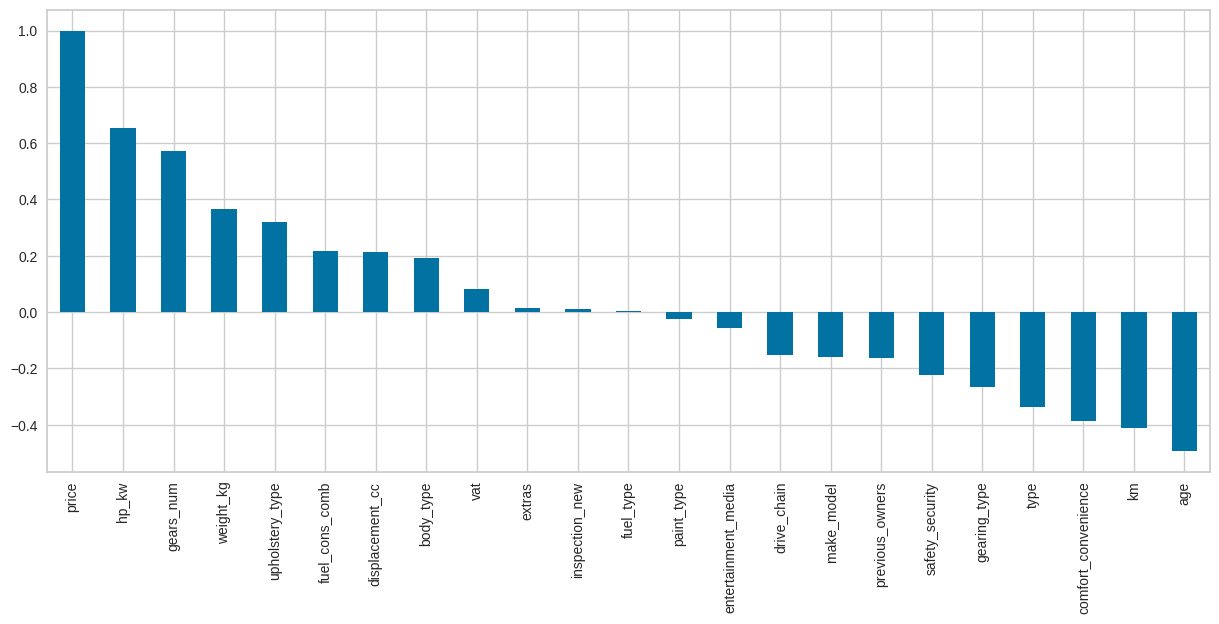

In [31]:
# Target vs other Features

price_corr.plot(kind='bar',figsize=(15,6))

**NOTE:**

1. **Strong Positive Correlations with Price:**
   - **Gears Number (`gears_num`):** Shows a strong positive correlation with `price` (0.53), indicating that cars with more gears tend to be more expensive.
   - **Engine Power (`hp_kW`):** Exhibits a moderate positive correlation with `price` (0.45), suggesting that higher-powered cars are generally more expensive.
   - **Engine Displacement (`displacement_cc`):** Has a moderate positive correlation with `price` (0.36), indicating that cars with larger engine displacements tend to be more expensive.

2. **Negative Correlations with Price:**
   - **Mileage (`km`):** Displays a negative correlation with `price` (-0.35), suggesting that cars with higher mileage tend to be cheaper.
   - **Age (`age`):** Exhibits a negative correlation with `price` (-0.21), indicating that older cars tend to be cheaper.
   - **Fuel Consumption (`fuel_cons_comb`):** Shows a moderate negative correlation with `price` (-0.30), indicating that cars with higher fuel consumption tend to be cheaper.

3. **Multicollinearity Considerations:**
   - **Gears Number (`gears_num`), Engine Power (`hp_kW`), and Engine Displacement (`displacement_cc`):** These features show strong correlations with each other and with `price`, suggesting potential multicollinearity.
   - **Mileage (`km`) and Age (`age`):** These features also show a strong correlation (0.76) with each other, indicating redundancy.

Managing multicollinearity among these highly correlated features is crucial to ensure model stability and performance. By addressing these correlations, we can build a more reliable and accurate price prediction model.

<a id="out"></a>
## Outlier Analysis

Linear models are generally sensitive to outliers because they seek linear relationships between data points and employ MSE-like loss functions that amplify large errors. Some models, such as decision trees and robust regression, are more resilient to outliers and are less affected by such data. Therefore, when choosing a model, the characteristics of the dataset and the presence of outliers should be considered.

- However, we will not intervene with outliers at the moment, but we can take action later according to the model's forecasting performance.
- Let's observe the outliers for now.

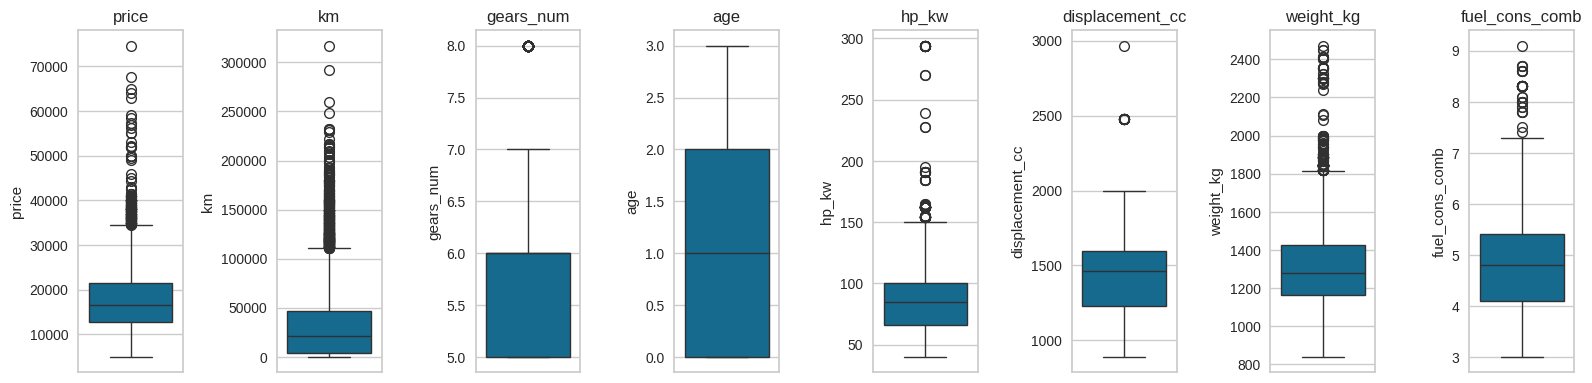

In [32]:
# Checking Outliers

# Initialize the subplot counter
x = 0

#Numerical features;
numerical_columns = ['price', 'km','gears_num','age','hp_kw','displacement_cc','weight_kg','fuel_cons_comb']

# Create a figure with specified size
plt.figure(figsize=(16, 4))

# Loop through each numerical column and create a boxplot
for col in numerical_columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col])
    plt.title(col)

# Show the plots
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

In [33]:
# Calculate skewness for numeric features

# A skewness value greater than 1 indicates positive skewness,
# a skewness value less than -1 indicates negative skewness,
# and a skewness value close to zero indicates a relatively symmetric distribution.

num_cols= df.select_dtypes('number').columns

skew_limit = 0.75               # define a limit above which we will log transform
skew_vals = df[num_cols].skew()


# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
km,1.648
hp_kw,1.463
weight_kg,1.164
inspection_new,1.103
previous_owners,1.055
price,1.046


### Target Variable

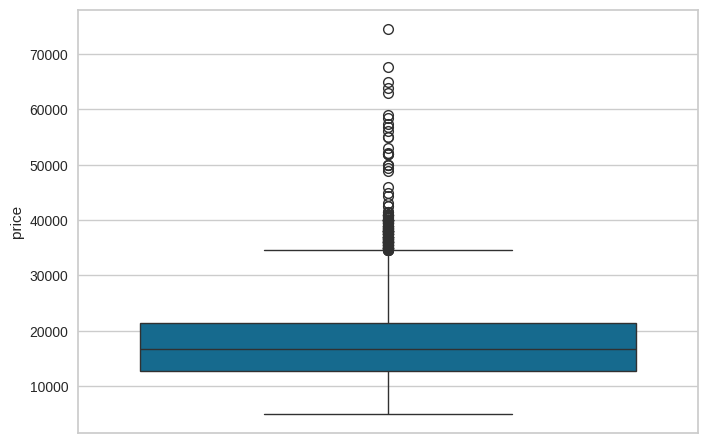

In [34]:
# Checking outliers for target variable 'price' with boxplot

sns.boxplot(df.price);

Skewness: 1.046253


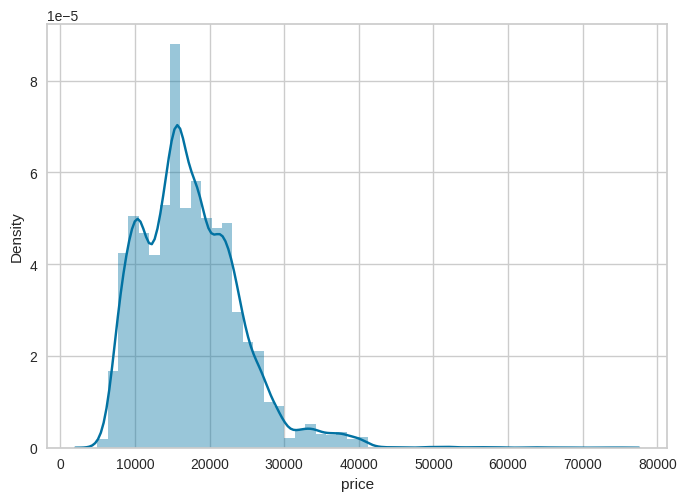

In [35]:
#Skewness of the target variable
print("Skewness: %f" % df['price'].skew())

# Distribution of target variable before log transformation
price_untransformed = sns.distplot(df['price'])

- The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5;
- moderate skewness is -0.5 to -1.0 and 0.5 to 1.0;
- and highly skewed distribution is < -1.0 and > 1.0.

*In our case, we have ~1.2, so it is considered skewed data.
Now, we can try to transform our data, so it looks more normally distributed.*

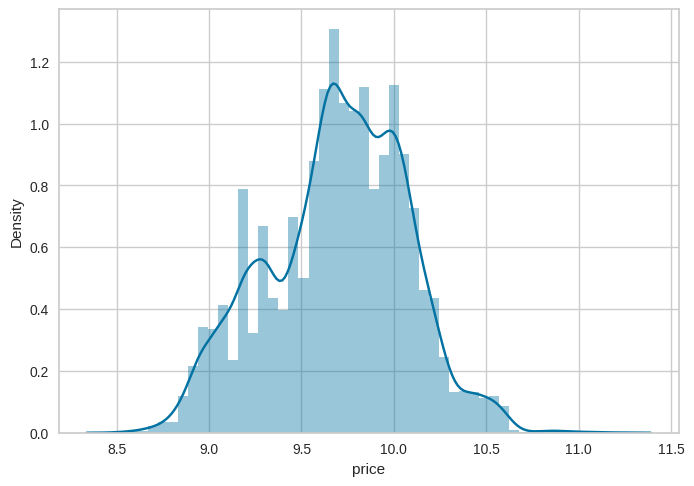

In [36]:
#After Log Transformation
price_transformed = sns.distplot(np.log(df['price']))

###  'Make_model' Feature

- *As we observed in the distributions of the `make_model` feature values above, Audi A2 has only one data point.
    - The fact that the Audi A2 has only one data point indicates that there is not enough data to represent this model.
    - it is insufficient for generalization and should be excluded from the analysis.  
    - By removing Audi A2, we ensure the model's stability and accuracy.

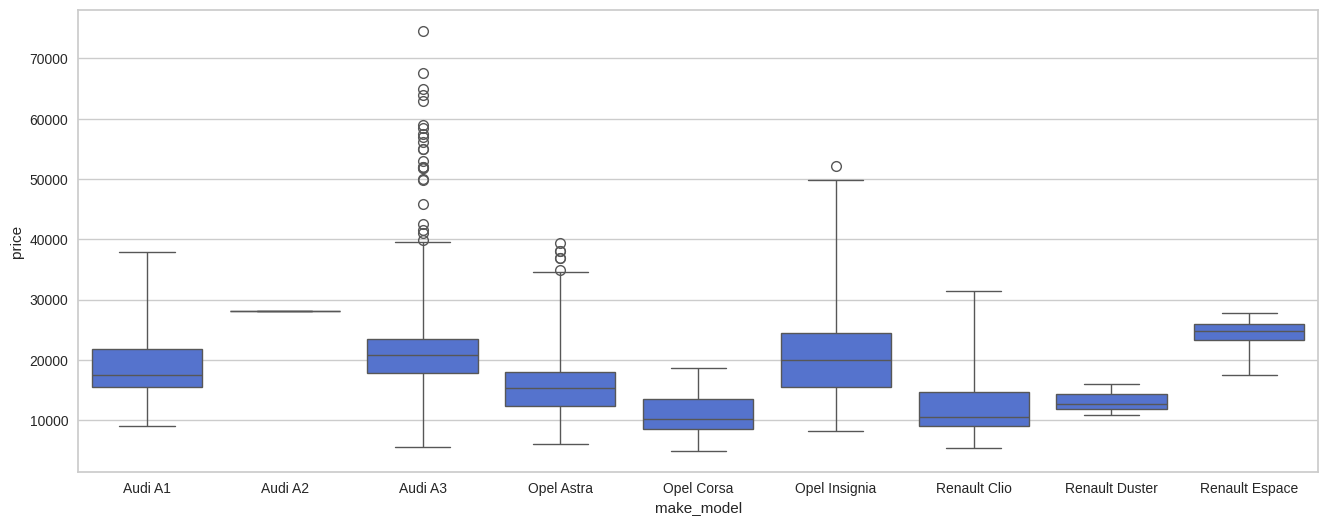

In [37]:
# Make and Models

plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3, color="royalblue")
plt.show()

In [38]:
# Outlier check for the make_model feature

total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A2         : 0    ,           The rate of outliers : 0.0
 The count of outlier for Audi A3         : 56   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 127  ,           The rate of outliers : 0.055
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 109  ,           The rate of outliers : 0.045
 The count of outlier for Renault Clio    : 37   ,           The rate of outliers : 0.025
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 4    ,           The rate of outliers : 0.018

Total_outliers :  338 The rate of total outliers : 0.025


- Some models, like Opel Astra, Opel Insignia, and Renault Clio, have a high number of outliers, indicating significant price deviations.
- Models like Audi A1, Opel Corsa, and Renault Duster have more consistent price distributions with fewer outliers.
- The overall outlier rate is 2.6%, showing the dataset's sensitivity to outliers.
- These outliers should be considered in analysis and modeling.

#### Remove the AudiA2 model from the df

In [39]:
models = df.make_model.value_counts()
models

,count
make_model,
Audi A3,2758
Opel Insignia,2417
Audi A1,2377
Opel Astra,2305
Opel Corsa,1994
Renault Clio,1486
Renault Espace,220
Renault Duster,20
Audi A2,1


In [40]:
# Dropping the only Audi A2 observation to increase model performance

df = df[df['make_model'] != 'Audi A2']

In [41]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,type,fuel_type,gears_num,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,fuel_cons_comb


<a id="eng"></a>
# Feature Engineering

### Get Dummies

**Explanation:**

**Original Data:** The `comfort_convenience`, `entertainment_media`, `extras`, and `safety_security` columns contain categorical values.

| comfort_convenience          | entertainment_media       | extras      | safety_security              |
|------------------------------|---------------------------|-------------|------------------------------|
| Air Conditioning, Cruise Control | Bluetooth, CD Player     | Alloy Wheels | ABS, Airbags                 |


**After Get Dummies:**

- Each category has been converted into a separate column.
- For example, `Air Conditioning` and `Cruise Control` are represented as separate columns with the `cc_` prefix.
- Similarly, other categories are represented with their own prefixes, with the presence of a category indicated by 1 and its absence by 0.

| cc_Air Conditioning | cc_Cruise Control | em_Bluetooth | em_CD Player | ex_Alloy Wheels | ss_ABS | ss_Airbags |
|---------------------|-------------------|--------------|--------------|----------------|--------|------------|
| 1                   | 1                 | 1            | 1            | 1              | 1      | 1          |


This process allows machine learning models to interpret these categorical features as numerical data, thereby improving model performance.

In [42]:
# Select the categorical features that have more than one value to separate

selected_columns = df.loc[:, ['comfort_convenience', 'entertainment_media', 'extras', 'safety_security']]
selected_columns.head()

,comfort_convenience,entertainment_media,extras,safety_security
0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D..."
1,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r..."
2,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D..."
3,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote..."
4,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect..."


In [43]:
# Get Dummies and seperate them

df = df.join(df["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [44]:
# Drop the original features we dont need anymore.

df.drop(["comfort_convenience","entertainment_media","extras","safety_security"], axis=1, inplace=True)

In [45]:
# One-Hot Encoding get_dummies for all df

df = pd.get_dummies(df, drop_first =True)

In [46]:
print(df.shape)

df.head(3)

#new features values are boolean dtype after get_dummies

(13577, 133)


,price,km,gears_num,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,fuel_cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear
0,15770.000,56013.000,7.000,3.000,2.000,66.000,1.000,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False
1,14500.000,80000.000,7.000,2.000,1.000,141.000,0.000,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,14640.000,83450.000,7.000,3.000,1.000,85.000,0.000,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False


In [47]:
# Convert boolean columns(after get_dummy) to integers, changing True to 1 and False to 0.

bool_columns = df.columns[df.dtypes == 'bool']
df[bool_columns] = df[bool_columns].astype(int)

In [48]:
print(df.shape)
df.head(3)

(13577, 133)


,price,km,gears_num,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,fuel_cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear
0,15770.000,56013.000,7.000,3.000,2.000,66.000,1.000,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500.000,80000.000,7.000,2.000,1.000,141.000,0.000,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640.000,83450.000,7.000,3.000,1.000,85.000,0.000,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0


In [49]:
# Check the correlation between target and all features(Including new features after get dummy)
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

,price
age,-0.492
km,-0.412
make_model_Opel Corsa,-0.402
gearing_type_Manual,-0.402
type_Used,-0.354
make_model_Renault Clio,-0.289
previous_owners,-0.165
drive_chain_front,-0.149
make_model_Opel Astra,-0.104
em_CD player,-0.076


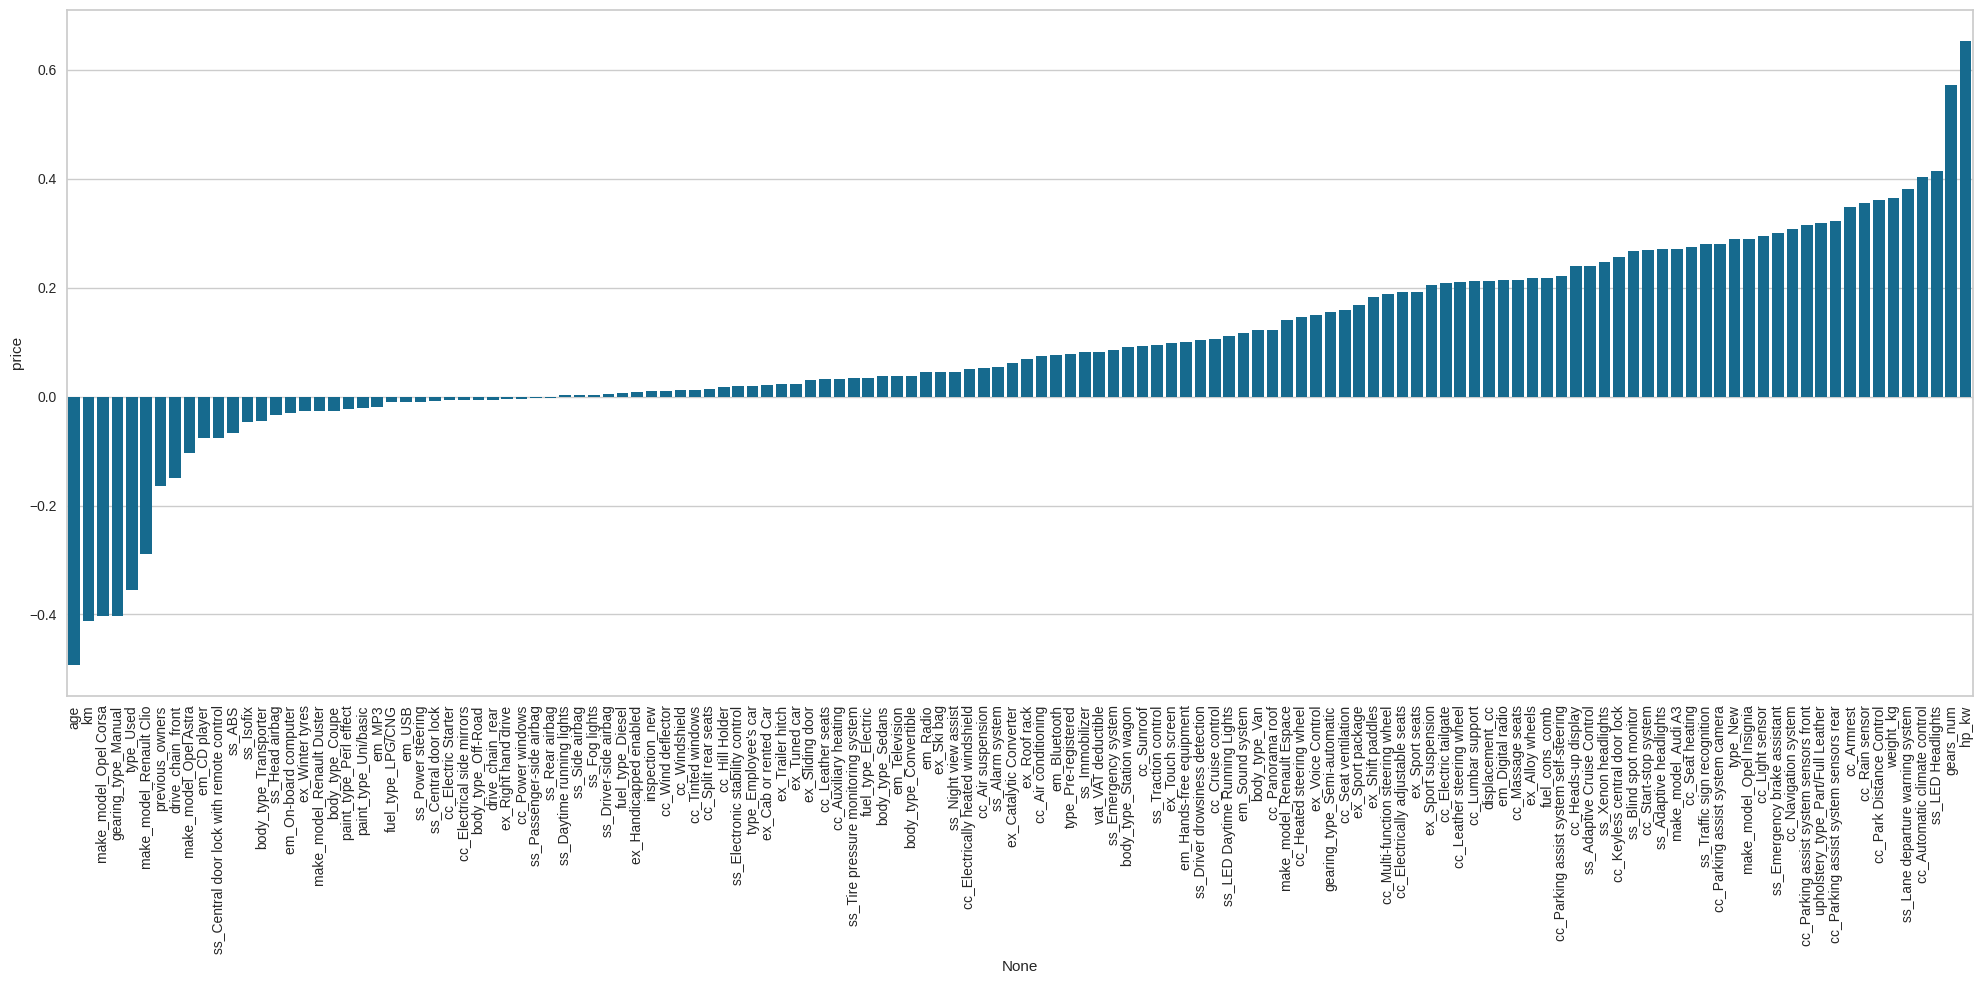

In [50]:
# Plot correlation between target and all features
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

<a id="4.1"></a>
# MACHINE LEARNING MODELLING

### Functions to use to evaluate the model's scores at the end.
#### --> Model Performance Evaluation Function: train_val()

- This function evaluates a model's performance on both the training and test datasets
- by calculating various metrics such as R², MAE, MSE, and RMSE.

In [51]:
def train_val(model, X_train, y_train, X_test, y_test, i):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {
    i+"_train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }

    return pd.DataFrame(scores)

#### --> Adjusted R² : adj_r2()

- R² Score: Indicates how much of the variance in the dependent variable is explained by the model.
- Adjusted R² Score: Adjusts the explanatory power of the model based on the number of independent variables, reducing the risk of overfitting.

In [52]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]
    p = df.shape[1]-1
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

<a id="5."></a>
## Split the Data

In [53]:
# Split Target and Independent Features

X= df.drop(columns="price")
y= df.price

In [54]:
# Train-test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X.shape

(13577, 132)

<a id="6."></a>
#  Linear Regression
- Started with a simple, basic model without any special optimizations, manipulations,scaling or outlier handling on the dataset, which in machine learning and data science is referred to as a "vanilla model."
- By observing the performance of this initial model, we can compare it with more complex and optimized models in the end if we need.


### Model

In [56]:
#Set and fit the model

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

### Prediction

In [57]:
# Prediction
y_pred = linear_model.predict(X_test)

# Calculation of the metrics of the test data to compare models at the end.
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(lm_R2)
print(lm_mae)
print(lm_rmse)

0.8740697202551692
1555.3244414867893
2232.2650034412422


### Evaluating the Linear Model

In [58]:
# Check the coefficients to see how it affects top-10 feature importance

lm1_coef = pd.DataFrame(linear_model.coef_, index = X.columns, columns=["lm1_Coeff"]).sort_values("lm1_Coeff")
lm1_coef.head(10)

,lm1_Coeff
make_model_Renault Duster,-9198.572
make_model_Renault Clio,-5248.349
make_model_Opel Corsa,-4836.039
make_model_Opel Astra,-3694.266
type_Employee's car,-2861.474
type_Used,-2686.406
drive_chain_rear,-2233.734
type_Pre-registered,-2080.966
ex_Right hand drive,-2009.400
drive_chain_front,-1527.754


In [59]:
# Performance metrics

lm_score = train_val(linear_model, X_train, y_train, X_test, y_test, 'linear')
lm_score

# The model shows a high R² score on the training data (0.89) and R² score on the test data (0.88),indicating potential overfitting.
# The difference between MAE and RMSE indicates outlier effect.

,linear_train,linear_test
R2,0.887,0.874
mae,1574.820,1555.324
mse,4996515.943,4983007.046
rmse,2235.289,2232.265


In [60]:
# Normalized RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmse:', rmse)

#Average error rate;
print('avg_error', rmse/df.price.mean())

rmse: 2232.2650034412422
avg_error 0.12818779952490725


In [61]:
# Adjusted R²

adj_r2(y_test, y_pred, df)

# Additionally, the Adjusted R² score (0.882) for the test data confirms that while the model explains a large portion of the variance,
# the inclusion of more features may not significantly improve the model's performance.

0.8728332729979305

**NOTE:**

- Initial linear regression model was built using the provided dataset without any data manipulation.
- The model explains 88.2% of the variance in the target variable, indicating a strong fit but with some room for improvement.

## Remove Outliers

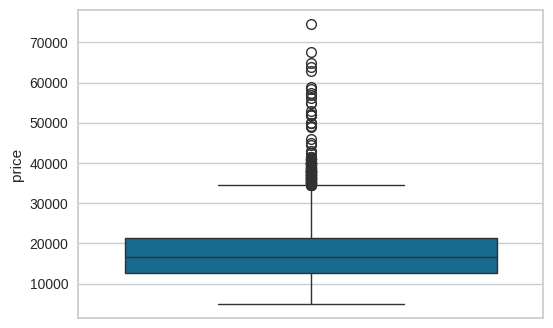

In [62]:
# Checking outliers for target variable 'price' with boxplot
plt.figure(figsize =(6,4))
sns.boxplot(df.price);

In [63]:
len(df[df.price > 35000])

252

In [64]:
# Excluding rows where the price is greater than 35,000 using new df1

df1 = df[~(df.price > 35000)]

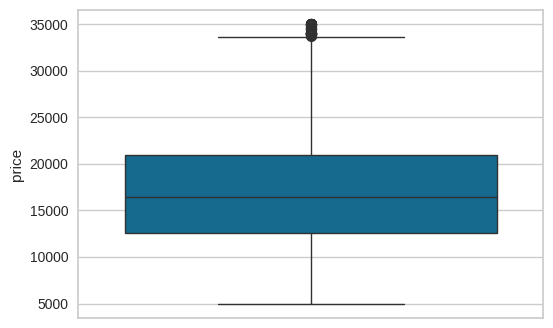

In [65]:
plt.figure(figsize = (6,4))
sns.boxplot(df1.price);

### Linear Model Without Outliers

In [66]:
#Split the data for df1

X = df1.drop(columns = "price")
y = df1.price

#Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [67]:
#Set and fit the model2

linear_model2 = LinearRegression()

linear_model2.fit(X_train, y_train)

LinearRegression()

In [68]:
# Check the coefficients to see how it affects feature importance

lm2_coef = pd.DataFrame(linear_model2.coef_, index = X.columns, columns=["lm2_Coeff"]).sort_values("lm2_Coeff")
lm2_coef.head(10)

,lm2_Coeff
make_model_Renault Duster,-8226.293
make_model_Renault Clio,-5448.393
make_model_Opel Corsa,-5425.252
make_model_Opel Astra,-3394.571
body_type_Convertible,-2278.831
type_Employee's car,-2216.016
type_Used,-2004.853
gearing_type_Manual,-1524.170
drive_chain_rear,-1494.003
age,-1459.737


In [69]:
# Prediction2

y_pred = linear_model2.predict(X_test)

# Calculation of the metrics of the test data to compare models at the end.
lm2_R2 = r2_score(y_test, y_pred)
lm2_mae = mean_absolute_error(y_test, y_pred)
lm2_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(lm2_R2)
print(lm2_mae)
print(lm2_rmse)

0.9037842751567087
1319.8911919479415
1802.19468837241


### Evaluating the Model

In [70]:
# Performance Metrics

lm2_score = train_val(linear_model2, X_train, y_train, X_test, y_test, 'linear2_out')
lm2_score

,linear2_out_train,linear2_out_test
R2,0.893,0.904
mae,1380.485,1319.891
mse,3637362.352,3247905.695
rmse,1907.187,1802.195


In [71]:
# Comparing the metric scores with Initial Linear Reg Model

results = pd.concat([lm_score, lm2_score], axis=1)
results

,linear_train,linear_test,linear2_out_train,linear2_out_test
R2,0.887,0.874,0.893,0.904
mae,1574.820,1555.324,1380.485,1319.891
mse,4996515.943,4983007.046,3637362.352,3247905.695
rmse,2235.289,2232.265,1907.187,1802.195


In [72]:
# Normalized RMSE of linear model without outliers on target
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmse:', rmse)

#Average error rate;
print('avg_error', rmse/df1.price.mean())

rmse: 1802.19468837241
avg_error 0.10606205536395512


- Before removing the outliers, our average prediction error was 13.81%.
- After excluding the outliers, it decreased to 11.31%.
- This represents an improvement of approximately 2.50% in our predictions.

# Scale Data

- In this section, we will rebuild the models using data scaled with MinMaxScaler.
- Scaling the data helps to normalize the feature ranges, which can improve the performance and convergence speed of the models

In [73]:
#Split

X= df.drop(columns="price")
y= df.price

In [74]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
#Scale -fit - transform

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regularization

<a id="7."></a>
## Ridge Regression

**GridSearchCV for Ridge Model**

In [76]:
from sklearn.model_selection import GridSearchCV

# Set the model
ridge = Ridge(random_state=42)



# Set the GridSearchCV and params
alpha_space = np.linspace(0.01, 100, 100)

param_grid = {"alpha":alpha_space}

ridge_model = GridSearchCV(estimator=ridge,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [77]:
# Fit the Model
ridge_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [78]:
ridge_model.best_params_

{'alpha': np.float64(1.02)}

In [79]:
# We obtained the best parameters for the Ridge model with alpha=1.02 after performing GridSearchCV.

# Set the Ridge model again with best alpha value;
ridge_model_alpha = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

# Check the coefficients to see how it affects feature importance
ridge_coef = pd.DataFrame(ridge_model_alpha.coef_, index = X.columns, columns=["ridge_Coef"]).sort_values("ridge_Coef")
ridge_coef.head(10)

,ridge_Coef
km,-10887.321
make_model_Renault Duster,-8021.216
make_model_Renault Clio,-5248.129
make_model_Opel Corsa,-4967.195
age,-4453.061
make_model_Opel Astra,-3643.351
type_Employee's car,-2846.523
type_Used,-2673.087
displacement_cc,-2352.966
type_Pre-registered,-2056.771


In [80]:
# Comparing the coefficients of the Ridge and initial linear regression models to assess feature importance

pd.concat([lm1_coef, ridge_coef], axis=1).head(10)

,lm1_Coeff,ridge_Coef
make_model_Renault Duster,-9198.572,-8021.216
make_model_Renault Clio,-5248.349,-5248.129
make_model_Opel Corsa,-4836.039,-4967.195
make_model_Opel Astra,-3694.266,-3643.351
type_Employee's car,-2861.474,-2846.523
type_Used,-2686.406,-2673.087
drive_chain_rear,-2233.734,-1764.638
type_Pre-registered,-2080.966,-2056.771
ex_Right hand drive,-2009.400,-1533.548
drive_chain_front,-1527.754,-1517.561


### - Prediction

In [81]:
# Prediction
y_pred = ridge_model.predict(X_test_scaled)

# Calculation of the metrics of the test data to compare models at the end.
ridge_R2 = r2_score(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(ridge_R2)
print(ridge_mae)
print(ridge_rmse)

0.8756269333985325
1549.6026053881865
2218.420336812768


### - Evaluating the Model

In [82]:
# Model evaluation metrics scores

ridge_scores = train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test, 'ridge')
ridge_scores

,ridge_train,ridge_test
R2,0.887,0.876
mae,1573.175,1549.603
mse,5003375.784,4921388.791
rmse,2236.823,2218.420


In [83]:
# Comparing the metric scores of earlier Models vs Grid Ridge Model

result = pd.concat([results, ridge_scores], axis=1)
result

,linear_train,linear_test,linear2_out_train,linear2_out_test,ridge_train,ridge_test
R2,0.887,0.874,0.893,0.904,0.887,0.876
mae,1574.820,1555.324,1380.485,1319.891,1573.175,1549.603
mse,4996515.943,4983007.046,3637362.352,3247905.695,5003375.784,4921388.791
rmse,2235.289,2232.265,1907.187,1802.195,2236.823,2218.420


<a id="8."></a>
## Lasso Regression

**GridSearchCV for Lasso Model**

In [84]:
# Set the model
lasso = Lasso(random_state=42)



# Set the GridSearchCV and params
alpha_space = np.linspace(0.01, 100, 100)

param_grid = {"alpha":alpha_space}

lasso_model = GridSearchCV(estimator=lasso,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [85]:
# Fit the Model
lasso_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [86]:
lasso_model.best_params_

{'alpha': np.float64(1.02)}

In [87]:
# We obtained the best parameters for the Lasso model with alpha=1.02 after performing GridSearchCV.

# Set the Lasso model again with best alpha params;
lasso_model_alpha = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

# Check the coefficients to see how it affects feature importance
lasso_coef = pd.DataFrame(lasso_model_alpha.coef_, index = X.columns, columns=["lasso_Coef"]).sort_values("lasso_Coef")
lasso_coef.head(10)

,lasso_Coef
km,-10978.775
make_model_Renault Duster,-7903.853
make_model_Renault Clio,-5155.812
make_model_Opel Corsa,-4843.420
age,-4446.842
make_model_Opel Astra,-3648.017
type_Employee's car,-2755.211
type_Used,-2598.395
displacement_cc,-2426.297
type_Pre-registered,-1962.154


In [88]:
pd.concat([ridge_coef, lasso_coef], axis=1).head(10)

# Comparing the coefficients of the Ridge and Lasso regression models,
# to understand how each regularization technique affects feature importance

,ridge_Coef,lasso_Coef
km,-10887.321,-10978.775
make_model_Renault Duster,-8021.216,-7903.853
make_model_Renault Clio,-5248.129,-5155.812
make_model_Opel Corsa,-4967.195,-4843.420
age,-4453.061,-4446.842
make_model_Opel Astra,-3643.351,-3648.017
type_Employee's car,-2846.523,-2755.211
type_Used,-2673.087,-2598.395
displacement_cc,-2352.966,-2426.297
type_Pre-registered,-2056.771,-1962.154


### - Prediction

In [89]:
# Prediction
y_pred = lasso_model.predict(X_test_scaled)

# Calculation of the metrics of the test data to compare models at the end.
lasso_R2 = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(lasso_R2)
print(lasso_mae)
print(lasso_rmse)

0.8762862520063437
1551.5234386852255
2212.5324487662792


### - Evaluating the Lasso Model

In [90]:
# Model evaluation metrics scores

lasso_scores = train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test, 'lasso')
lasso_scores

,lasso_train,lasso_test
R2,0.887,0.876
mae,1575.496,1551.523
mse,5014843.774,4895299.837
rmse,2239.385,2212.532


In [91]:
# Comparing the metric scores of Grid Ridge and Grid Lasso models to evaluate their performance, and
# to assess how each regularization technique affects the model's predictive accuracy and error metrics.

result = pd.concat([result, lasso_scores], axis=1)
result

,linear_train,linear_test,linear2_out_train,linear2_out_test,ridge_train,ridge_test,lasso_train,lasso_test
R2,0.887,0.874,0.893,0.904,0.887,0.876,0.887,0.876
mae,1574.820,1555.324,1380.485,1319.891,1573.175,1549.603,1575.496,1551.523
mse,4996515.943,4983007.046,3637362.352,3247905.695,5003375.784,4921388.791,5014843.774,4895299.837
rmse,2235.289,2232.265,1907.187,1802.195,2236.823,2218.420,2239.385,2212.532


- The comparison of metric scores indicates that both Grid Ridge and Grid Lasso models perform similarly,
- with Lasso slightly outperforming Ridge in test set R² and RMSE,
- suggesting marginally better generalization for the Lasso model.

<a id="9."></a>
## Elastic-Net Regression

**GridSearchCV for ElasticNet Model**

In [92]:
# Set the model
elastic = ElasticNet(random_state=42)



# Set the GridSearchCV and params for ElasticNet (alpha and l1_ratio)
param_grid = {
    'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
    'l1_ratio': [.5, .7, .9, .95, .99, 1]
}

elastic_model = GridSearchCV(estimator=elastic,
                                  param_grid=param_grid,
                                  scoring='neg_root_mean_squared_error',
                                  cv=10,
                                  n_jobs=-1)

alpha:

- This parameter controls the overall regularization strength.
- When alpha = 0, ElasticNet performs no regularization.
= As the alpha value increases, the strength of regularization increases, which can help the model become more resistant to overfitting.

l1_ratio:
- This parameter controls the mixture between L1 (Lasso) and L2 (Ridge) regularization.
- When l1_ratio = 1, it means this is entirely L1 (i.e., only Lasso).
- When l1_ratio = 0, it means this is entirely L2 (i.e., only Ridge).
- When 0 < l1_ratio < 1, you get a combination of both L1 and L2 regularizations.
- For example, if l1_ratio = 0.5, it means L1 and L2 regularizations are used equally.

In [93]:
# Fit the Model
elastic_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [94]:
elastic_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [95]:
# Prediction
y_pred = elastic_model.predict(X_test_scaled)

# Calculation of the metrics of the test data to compare models at the end.
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(em_R2)
print(em_mae)
print(em_rmse)

0.8762862520063437
1551.5234386852255
2212.5324487662792


In [96]:
# Model evaluation metrics scores

elastic_scores = train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test, 'elastic')
elastic_scores

,elastic_train,elastic_test
R2,0.887,0.876
mae,1575.496,1551.523
mse,5014843.774,4895299.837
rmse,2239.385,2212.532


In [97]:
# Comparing the metric scores of models to evaluate their performance, and
# to assess how each regularization technique affects the model's predictive accuracy and error metrics.

result = pd.concat([result, elastic_scores], axis=1)
result

,linear_train,linear_test,linear2_out_train,linear2_out_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test
R2,0.887,0.874,0.893,0.904,0.887,0.876,0.887,0.876,0.887,0.876
mae,1574.820,1555.324,1380.485,1319.891,1573.175,1549.603,1575.496,1551.523,1575.496,1551.523
mse,4996515.943,4983007.046,3637362.352,3247905.695,5003375.784,4921388.791,5014843.774,4895299.837,5014843.774,4895299.837
rmse,2235.289,2232.265,1907.187,1802.195,2236.823,2218.420,2239.385,2212.532,2239.385,2212.532


**Comparing all Models**

- The linear2_out model, where outliers were excluded from the target feature, showed the best performance with the highest R² scores and the lowest MAE, MSE, and RMSE, But Considering Overfitting.
- Ridge, Lasso, and Elastic Net regressions with scale had similar performance, not significantly better than the second linear model.
- By combining the benefits of outlier removal and Lasso regularization, could achieve a more accurate and interpretable model.

<br>

**--> Let's try to see the combined model: Lasso Model without Outliers**

## Lasso2 (alpha=1.02) Model without Outliers

In [98]:
# Excluding rows where the price is greater than 35,000 using df_final
print(len(df[df.price > 35000]))

df2 = df[~(df.price > 35000)]

252


In [99]:
#Split the data

X = df2.drop(columns = "price")
y = df2.price

In [100]:
# Split train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [101]:
#Scale -fit - transform - X

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### - Model

In [102]:
# Set the model
lasso2 = Lasso(alpha=1.02, random_state=42)

In [103]:
# Fit the Model
lasso2.fit(X_train_scaled,y_train)

Lasso(alpha=1.02, random_state=42)

### - Prediction

In [104]:
# Prediction
y_pred = lasso2.predict(X_test_scaled)

# Calculation of the metrics of the test data to compare models at the end.
lasso2_R2 = r2_score(y_test, y_pred)
lasso2_mae = mean_absolute_error(y_test, y_pred)
lasso2_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(lasso2_R2)
print(lasso2_mae)
print(lasso2_rmse)

0.9040132474062108
1319.561534159861
1800.0489976828405


### - Evaluating the Lasso Model

In [105]:
# Model evaluation metrics scores

lasso2_scores = train_val(lasso2, X_train_scaled, y_train, X_test_scaled, y_test, 'lasso2')
lasso2_scores

,lasso2_train,lasso2_test
R2,0.893,0.904
mae,1380.681,1319.562
mse,3650211.652,3240176.394
rmse,1910.553,1800.049


In [106]:
# Comparing the metric scores of Grid Ridge and Grid Lasso models to evaluate their performance, and
# to assess how each regularization technique affects the model's predictive accuracy and error metrics.

result = pd.concat([result, lasso2_scores], axis=1)
result

,linear_train,linear_test,linear2_out_train,linear2_out_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test,lasso2_train,lasso2_test
R2,0.887,0.874,0.893,0.904,0.887,0.876,0.887,0.876,0.887,0.876,0.893,0.904
mae,1574.820,1555.324,1380.485,1319.891,1573.175,1549.603,1575.496,1551.523,1575.496,1551.523,1380.681,1319.562
mse,4996515.943,4983007.046,3637362.352,3247905.695,5003375.784,4921388.791,5014843.774,4895299.837,5014843.774,4895299.837,3650211.652,3240176.394
rmse,2235.289,2232.265,1907.187,1802.195,2236.823,2218.420,2239.385,2212.532,2239.385,2212.532,1910.553,1800.049


**Comparing Models:**
- The Ridge model, while scaled, does not outperform the Linear2 and Final Lasso models, indicating that the additional complexity does not provide a significant benefit in this case.

Recommendation for the Final Model:
- The Lasso2 model is recommended as it combines the benefits of regularization through Lasso, data scaling, and outlier removal, leading to robust performance and minimal overfitting.

<a id="10."></a>
# Feature Importance

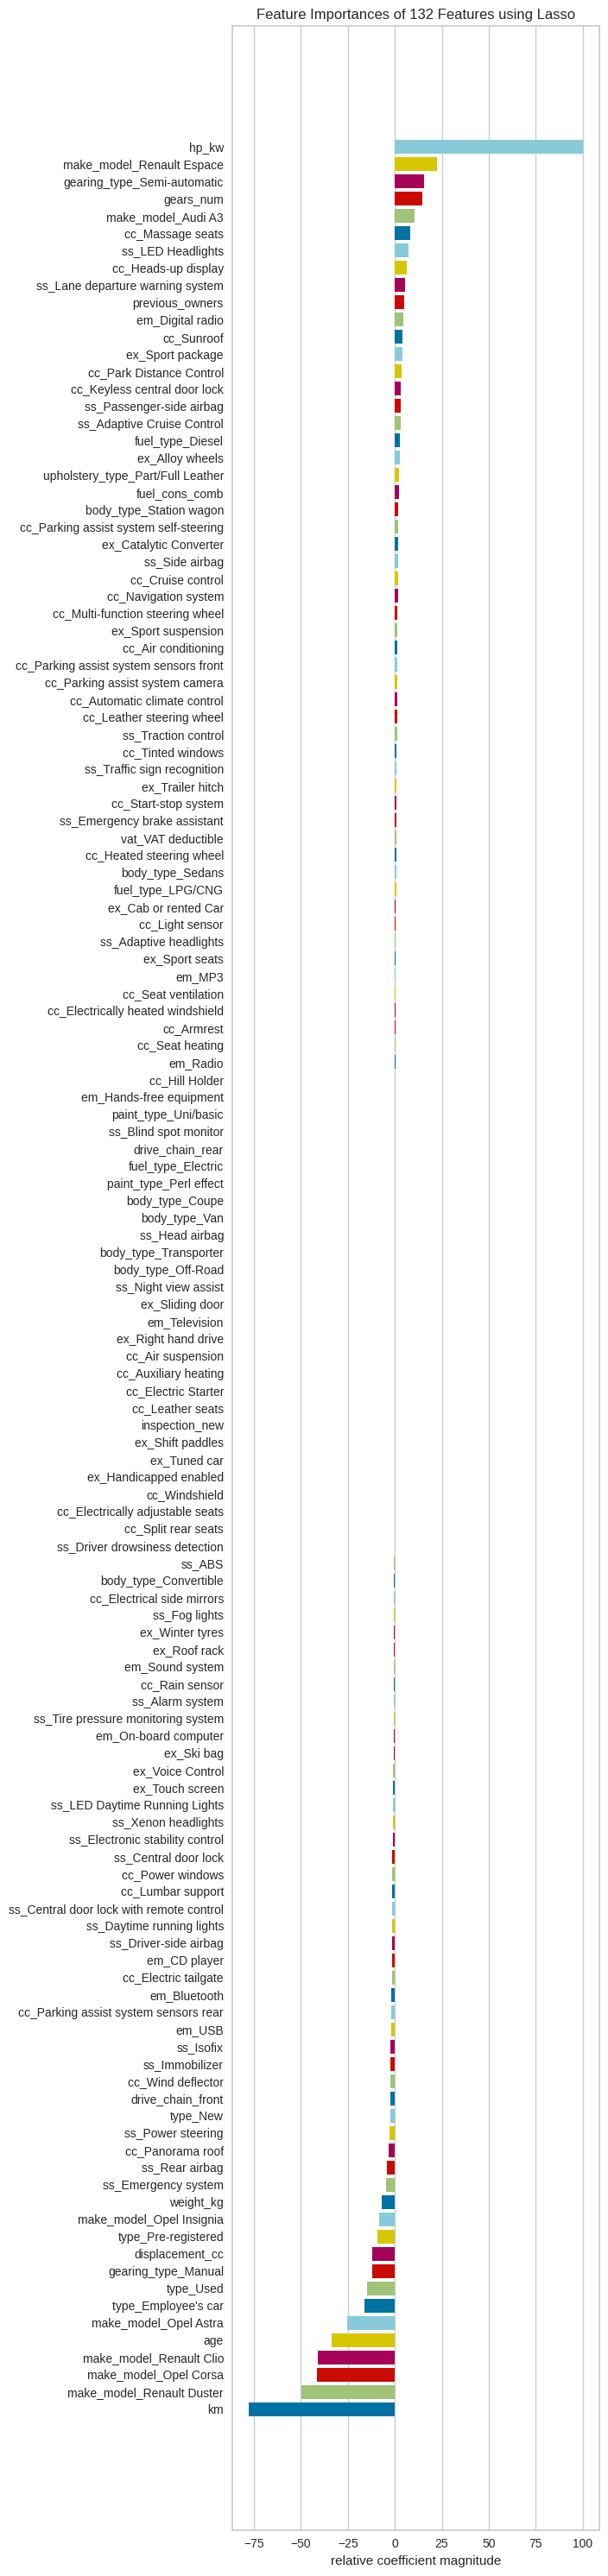

<Axes: title={'center': 'Feature Importances of 132 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [107]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns) # Lasso Model is selected here
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

# We will use Lasso for the Final model

## Lasso3 Model with Selected Features

In [169]:
# Create new df with the selected features

df_new = df0[["make_model", "hp_kW", "km", "age", "Gearing_Type", "price"]]

# Selecting the top 5 features with the most impact on prediction.
# You might wonder why the make_model feature was chosen. When examining the visualization above,
# it was observed that among the features with the most impact on prediction, the make_model feature includes unique categorical observations (such as Audi A3, Audi A1, Renault Espace, etc.).

In [170]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770.000
1,Audi A1,141.000,80000.000,2.000,Automatic,14500.000
2,Audi A1,85.000,83450.000,3.000,Automatic,14640.000
3,Audi A1,66.000,73000.000,3.000,Automatic,14500.000
4,Audi A1,66.000,16200.000,3.000,Automatic,16790.000


In [171]:
df_new.make_model.value_counts()

,count
make_model,
Audi A3,3097
Audi A1,2614
Opel Insignia,2598
Opel Astra,2525
Opel Corsa,2216
Renault Clio,1839
Renault Espace,253
Renault Duster,34
Audi A2,1


In [172]:
df_new.isnull().sum()

,0
make_model,0
hp_kW,1
km,1
age,1
Gearing_Type,1
price,1


In [173]:
# Remove records with any missing values
df_new = df_new.dropna()

# Reset the index (optional)
df_new.reset_index(drop=True, inplace=True)


In [174]:
df_new.isnull().sum()

,0
make_model,0
hp_kW,0
km,0
age,0
Gearing_Type,0
price,0


In [175]:
df_new = df_new[df_new['make_model'] != 'Audi A2']  # Excluding data has only 1 value

In [176]:
df_new = df_new[~(df_new.price > 35000)] # Excluding the Outliers from target feature

In [177]:
df_new = pd.get_dummies(df_new) # Get Dummies for the final dataset

print(len(df_new))
df_new.head(3)

# After get dummy, features have boolean dtype.

14917


,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770.000,True,False,False,False,False,False,False,False,True,False,False
1,141.000,80000.000,2.000,14500.000,True,False,False,False,False,False,False,False,True,False,False
2,85.000,83450.000,3.000,14640.000,True,False,False,False,False,False,False,False,True,False,False


### Split and Scale for df_new

In [178]:
X = df_new.drop(columns=["price"])
y = df_new.price

In [179]:
X.isnull().sum()

,0
hp_kW,0
km,0
age,0
make_model_Audi A1,0
make_model_Audi A3,0
make_model_Opel Astra,0
make_model_Opel Corsa,0
make_model_Opel Insignia,0
make_model_Renault Clio,0
make_model_Renault Duster,0


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [181]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model

In [182]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha': alpha_space}

lasso3 = GridSearchCV(estimator=lasso_model,
                                 param_grid=param_grid,
                                 scoring='neg_root_mean_squared_error',
                                 cv=10,
                                 n_jobs=-1)

In [183]:
lasso3.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [184]:
lasso3.best_params_

{'alpha': np.float64(0.01)}

In [185]:
lasso3.best_score_ # best score of the test data

np.float64(-2166.5368209688745)

In [186]:
#Prediction
y_pred = lasso3.predict(X_test_scaled)

lasso3_R2 = r2_score(y_test, y_pred)
lasso3_mae = mean_absolute_error(y_test, y_pred)
lasso3_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [187]:
# Model evaluation metrics scores

lasso3_scores = train_val(lasso3, X_train_scaled, y_train, X_test_scaled, y_test, 'lasso3')
lasso3_scores

,lasso3_train,lasso3_test
R2,0.863,0.863
mae,1555.754,1555.170
mse,4681985.751,4797519.161
rmse,2163.790,2190.324


In [188]:
result = pd.concat([result, lasso3_scores], axis=1)
result

,linear_train,linear_test,linear2_out_train,linear2_out_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test,lasso2_train,lasso2_test,lasso3_train,lasso3_test
R2,0.887,0.874,0.893,0.904,0.887,0.876,0.887,0.876,0.887,0.876,0.893,0.904,0.863,0.863
mae,1574.820,1555.324,1380.485,1319.891,1573.175,1549.603,1575.496,1551.523,1575.496,1551.523,1380.681,1319.562,1555.754,1555.170
mse,4996515.943,4983007.046,3637362.352,3247905.695,5003375.784,4921388.791,5014843.774,4895299.837,5014843.774,4895299.837,3650211.652,3240176.394,4681985.751,4797519.161
rmse,2235.289,2232.265,1907.187,1802.195,2236.823,2218.420,2239.385,2212.532,2239.385,2212.532,1910.553,1800.049,2163.790,2190.324


- The Lasso3 model, which included only the selected features `["make_model", "hp_kW", "km", "age", "Gearing_Type", "price"]`, demonstrated slightly lower performance with R² scores of 0.867 (train) and 0.877 (test), but it still maintained a reasonable prediction accuracy.

**- Overall, the lasso2 model, where outlier excluded with Lasso regularization on the original df, provides the best balance of accuracy and robustness, indicating that removing outliers and focusing on relevant features significantly improves model performance.**

# Compare Models Performance

In [189]:
scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    "linear2_m": {
        "r2_score": lm2_R2,
        "mae": lm2_mae,
        "rmse": lm2_rmse
    },
    "ridge_m": {
        "r2_score": ridge_R2,
        "mae": ridge_mae,
        "rmse": ridge_rmse
    },
    "lasso_m": {
        "r2_score": lasso_R2,
        "mae": lasso_mae,
        "rmse": lasso_rmse
    },
     "lasso2_m": {
        "r2_score": lasso2_R2,
        "mae": lasso2_mae,
        "rmse": lasso2_rmse
    },
    "lasso3_m": {
        "r2_score": lasso3_R2,
        "mae": lasso3_mae,
        "rmse": lasso3_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.874,1555.324,2232.265
linear2_m,0.904,1319.891,1802.195
ridge_m,0.876,1549.603,2218.420
lasso_m,0.876,1551.523,2212.532
lasso2_m,0.904,1319.562,1800.049
lasso3_m,0.863,1555.170,2190.324


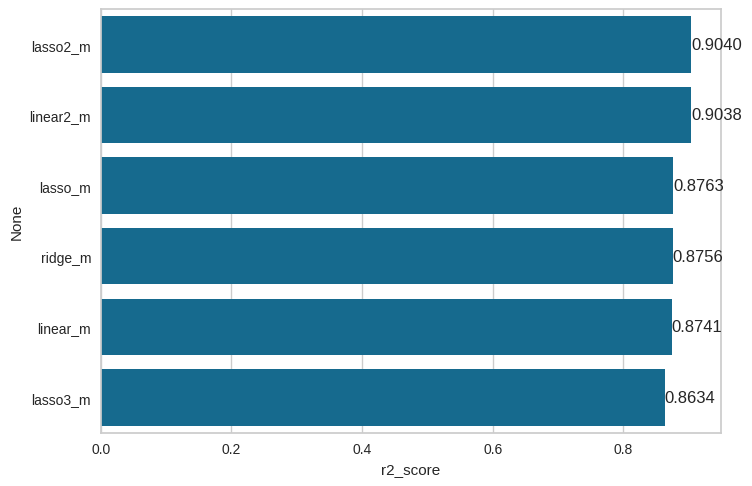

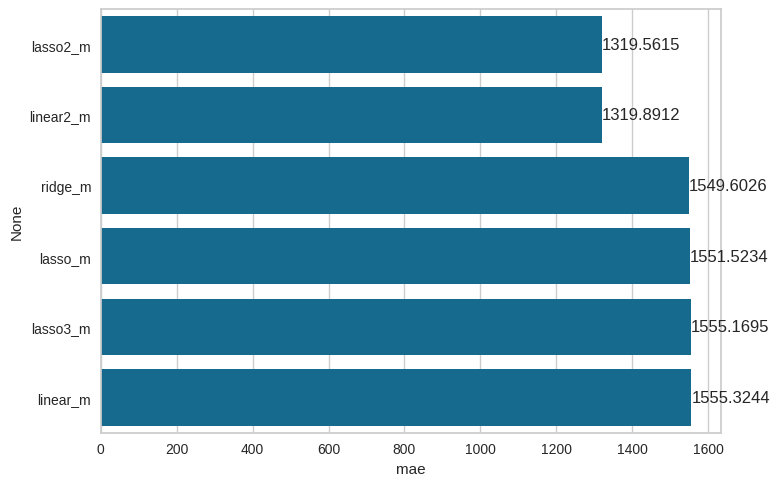

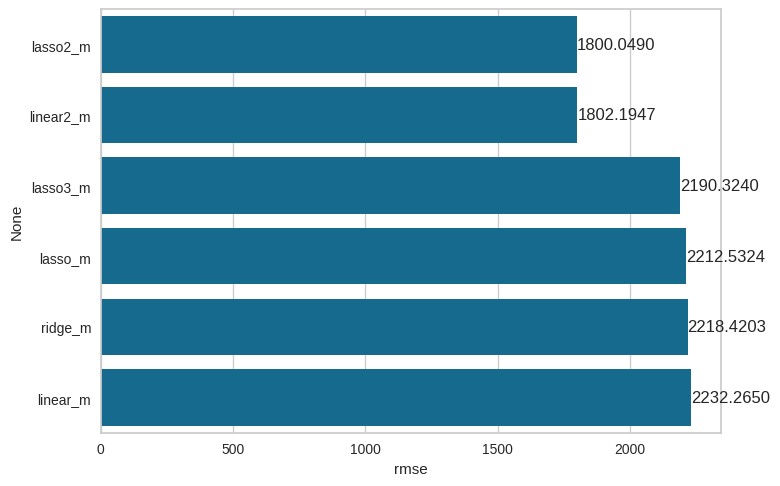

In [190]:
#metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center')

**Conclusion:**

- The lasso2_m model, which excludes outliers and applies Lasso regularization, consistently performs the best across all metrics (R², MAE, MSE), making it the most effective model.
- The final_m model, which includes feature selection, also shows good performance, particularly in MAE and MSE, but does not outperform lasso2_m.
- Regularization techniques like Lasso and Ridge improve model performance compared to the simple linear model, but removing outliers significantly enhances the results.

    - **Based on these metrics, the lasso2_m model is recommended for its superior accuracy and lower error rates.**

# Final Model
- As selected, the Lasso2 model will be used for the final model where we removed the outliers and applied Lasso regularization alpha=0.01

## Model

In [191]:
# Excluding rows where the price is greater than 35,000 using df_final
print(len(df[df.price > 35000]))

df2 = df[~(df.price > 35000)]

252


In [192]:
df2.shape

(13325, 133)

In [193]:
#Split the data

X = df2.drop(columns = "price")
y = df2.price

In [194]:
# Set the model and scaler with pipline

operations = [('scaler', MinMaxScaler()),('lasso', Lasso(alpha=1.02))]
final_model = Pipeline(steps=operations)
final_model.fit(X,y)

Pipeline(steps=[('scaler', MinMaxScaler()), ('lasso', Lasso(alpha=1.02))])

In [195]:
import pickle

# To export the model
pickle.dump(final_model, open('AutoScout24','wb'))

In [196]:
final_model = pickle.load(open('AutoScout24','rb'))

## Predict New Observations

### Creating new samples for prediction

In [197]:
# Get the columns of the original dataset
columns = df2.drop(columns=['price']).columns

# Generate random values (using normal distribution)
n_samples = 5
n_features = len(columns)
random_data = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))

# Convert the new random data sample to a DataFrame
new_sample = pd.DataFrame(random_data, columns=columns)

print(new_sample.shape)
new_sample.head()

(5, 132)


,km,gears_num,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,fuel_cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear
0,1.280,-0.037,0.077,0.638,-0.486,0.465,-0.133,-1.184,0.885,-0.487,1.095,-0.308,1.138,-0.138,-0.227,-1.286,-0.594,1.085,1.387,1.059,0.907,-1.073,-0.937,-1.496,-0.309,0.086,1.532,-0.440,-0.391,0.947,-0.776,-0.224,-0.819,-0.878,-0.621,0.216,0.081,-0.762,0.694,0.119,0.436,-1.562,-0.396,0.395,-0.263,-0.574,1.413,1.701,0.251,-1.266,1.151,-0.346,-0.479,0.886,-0.892,-0.237,0.448,0.876,-0.543,1.121,0.255,-0.039,0.089,-1.391,1.382,0.448,-0.620,0.188,0.673,1.054,1.323,-0.225,-1.799,-0.387,-0.315,-1.394,0.301,2.008,-0.504,0.192,-0.718,-0.369,0.085,-1.161,-0.223,-0.101,0.646,0.589,0.904,0.127,-0.109,0.079,0.317,-0.994,1.664,-0.774,0.283,0.821,0.976,-1.534,2.422,-0.285,-0.361,-0.924,0.003,0.699,0.298,-1.383,-0.096,-0.574,-0.256,-0.213,0.427,-0.101,-0.451,0.279,-1.270,1.304,-0.041,0.557,-0.350,-0.612,-0.139,-0.138,-0.343,-0.500,0.252,0.214,0.050,-0.460,0.896,-0.835
1,-0.572,1.633,1.899,-0.655,2.321,-0.274,-1.865,-2.039,-1.252,-0.571,-1.158,0.423,-0.015,0.138,0.141,-1.188,-1.268,-0.863,0.137,0.757,-1.388,0.242,-0.350,0.079,0.611,-0.377,0.159,2.406,-1.375,-0.765,-1.016,-1.815,-0.431,1.103,2.008,-1.313,-0.865,1.415,-0.469,0.353,-1.487,2.436,-0.731,-1.752,-1.457,-0.465,0.349,-0.337,-1.478,-0.981,-0.506,1.158,-0.009,-1.284,-1.781,-0.837,0.912,-0.349,0.060,0.545,0.011,1.298,0.856,0.942,-0.038,-0.036,-0.411,0.841,-0.177,-0.572,1.076,-2.535,-2.112,-0.212,1.056,-0.241,0.127,0.728,0.7

In [198]:
# Scale the new sample data using the pre-fitted MinMaxScaler

new_sample_scaled = final_model.named_steps['scaler'].transform(new_sample)

In [200]:
# Prediction

y_pred = final_model.predict(new_sample_scaled)

y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Prices'])
y_pred_df

,Predicted Prices
0,13920.912
1,978.753
2,6124.789
3,18515.539
4,19090.217
